In [1]:
import sys
sys.path.append('../')

import pickle

folder = '/local/scratch_2/jls/virac_classifier/variable/edr3_EAEB/'
with open(folder+'variable_classifier.pkl', 'rb') as f:
    var = pickle.load(f)
with open(folder+'variable_training_set.pkl', 'rb') as f:
    var_dataset_scaled = pickle.load(f)
with open(folder+'variable_features_total.pkl', 'rb') as f:
    var_dataset_full = pickle.load(f)
with open(folder+'variable_features_mira.pkl', 'rb') as f:
    mira_features = pickle.load(f)
var_dataset_full = pd.concat([var_dataset_full, mira_features], axis=0)
var_dataset = var_dataset_full.merge(var_dataset_scaled[['sourceid', 'class', 'prob']], on='sourceid')
var_dataset_full = var_dataset_full[(~var_dataset_full['error'])].reset_index(drop=True)

mira_table = pd.read_csv('../mira_sample.csv')
combo_dset=pd.merge(var_dataset, mira_table, how='left', left_on='sourceid',right_on='virac_id')
combo_dset.loc[combo_dset['cat_period']!=combo_dset['cat_period'],'cat_period']=combo_dset['period'][combo_dset['cat_period']!=combo_dset['cat_period']]

var_dataset_full.loc[var_dataset_full['var_class']=='MIRA','var_class']='LPV'
var_dataset_full.loc[var_dataset_full['var_class']=='SRV','var_class']='LPV'
var_dataset_full.loc[var_dataset_full['var_class']=='OSARG','var_class']='LPV'
var_dataset_full.loc[var_dataset_full['var_class']=='RRc','var_class']='RRcd'
var_dataset_full.loc[var_dataset_full['var_class']=='RRd','var_class']='RRcd'

var_dataset.loc[var_dataset['var_class']=='MIRA','var_class']='LPV'
var_dataset.loc[var_dataset['var_class']=='SRV','var_class']='LPV'
var_dataset.loc[var_dataset['var_class']=='OSARG','var_class']='LPV'
var_dataset.loc[var_dataset['var_class']=='RRc','var_class']='RRcd'
var_dataset.loc[var_dataset['var_class']=='RRd','var_class']='RRcd'

combo_dset.loc[combo_dset['var_class']=='MIRA','var_class']='LPV'
combo_dset.loc[combo_dset['var_class']=='SRV','var_class']='LPV'
combo_dset.loc[combo_dset['var_class']=='OSARG','var_class']='LPV'
combo_dset.loc[combo_dset['var_class']=='RRc','var_class']='RRcd'
combo_dset.loc[combo_dset['var_class']=='RRd','var_class']='RRcd'


/home/jls/.local/lib/python3.5/site-packages/xgboost/__init__.py:29: FutureWarning: Python 3.5 support is deprecated; XGBoost will require Python 3.6+ in the near future. Consider upgrading to Python 3.6+.
  FutureWarning)
/data/jls/python3.5/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [45]:
len(var_dataset_full)

440828

/data/jls/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


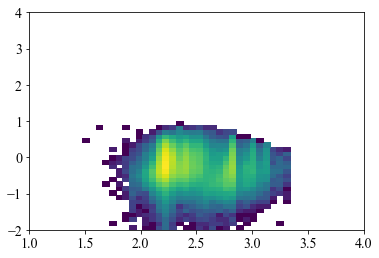

In [42]:
plt.hist2d(np.log10(var_dataset['ks_n_detections'][var_dataset['class']!='CONST']),
           np.log10(var_dataset['ks_stetson_j'][var_dataset['class']!='CONST'])
           -1.*np.log10(var_dataset['ks_n_detections'][var_dataset['class']!='CONST']),bins=50,
           range=[[1,4],[-2,4]],
           norm=LogNorm()
          );

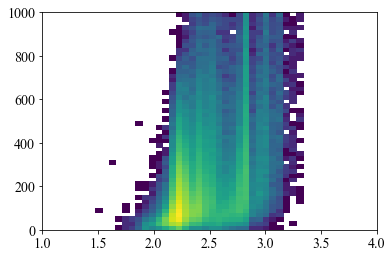

In [28]:
plt.hist2d(np.log10(var_dataset['ks_n_detections'][var_dataset['class']!='CONST']),
           var_dataset['ks_stetson_j'][var_dataset['class']!='CONST']
           -0.*np.log10(var_dataset['ks_n_detections'][var_dataset['class']!='CONST']),bins=50,
           range=[[1,4],[0,1000]],norm=LogNorm());

In [3]:
var.feature_importance

{'HK_col': 0.0074078697,
 'H_model': 0.0029307208,
 'H_scale': 0.0023730667,
 'JK_col': 0.024076844,
 'J_model': 0.0072382237,
 'J_scale': 0.0036682114,
 'Y_model': 0.005660476,
 'Y_scale': 0.003990104,
 'Z_model': 0.0075939577,
 'Z_scale': 0.00548976,
 'a0_a1': 0.00952991,
 'a0_a1_double': 0.008092079,
 'a0_a2': 0.009181605,
 'a0_a2_double': 0.0024457176,
 'a0_a3': 0.0045191306,
 'a0_a3_double': 0.013840815,
 'a1_a2': 0.004502829,
 'a1_a2_double': 0.006794932,
 'a1_a3': 0.004030683,
 'a1_a3_double': 0.011134299,
 'a2_a3': 0.0032680582,
 'a2_a3_double': 0.0042538177,
 'amp_0': 0.024343368,
 'amp_1': 0.013840369,
 'amp_2': 0.004382756,
 'amp_3': 0.00599458,
 'amp_double_0': 0.021038594,
 'amp_double_1': 0.051321957,
 'amp_double_2': 0.0032936065,
 'amp_double_3': 0.0531833,
 'amplitude': 0.035442803,
 'beyondfrac': 0.0030644892,
 'delta_loglik': 0.006743363,
 'ks_eta': 0.0029331776,
 'ks_kurtosis': 0.0035374279,
 'ks_mad': 0.015276525,
 'ks_mad_over_error': 0.024542721,
 'ks_p100_p0': 0

In [5]:
from itertools import product
def pplt(displ,figsize,
        include_values=True, cmap=plt.cm.Greys, 
                  ax=None, xticks_rotation='horizontal',
                  values_format=None,colorbar=False):
    fig, ax = plt.subplots(figsize=figsize)

    cm = displ.confusion_matrix
    n_classes = cm.shape[0]
    displ.im_ = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    displ.text_ = None

    cmap_min, cmap_max = displ.im_.cmap(0), displ.im_.cmap(256)

    if include_values:
        displ.text_ = np.empty_like(cm, dtype=object)
        if values_format is None:
            values_format = '.2g'

        # print text with appropriate color depending on background
        thresh = (cm.max() + cm.min()) / 2.0
        for i, j in product(range(n_classes), range(n_classes)):
            color = cmap_max if cm[i, j] < thresh else cmap_min
            displ.text_[i, j] = ax.text(j, i,
                                       format(cm[i, j], values_format),
                                       ha="center", va="center",
                                       color=color)

    if colorbar:
        fig.colorbar(displ.im_, ax=ax)
    ax.set(xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=displ.display_labels,
           yticklabels=displ.display_labels,
           ylabel="True label",
           xlabel="Predicted label")

    ax.set_ylim((n_classes - 0.5, -0.5))
    plt.setp(ax.get_xticklabels(), rotation=xticks_rotation)

    displ.figure_ = fig
    displ.ax_ = ax
    return displ

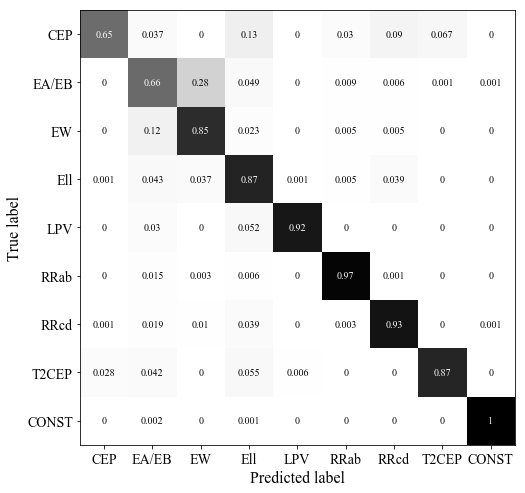

In [46]:
from initial_classif.classifier.classifier import ConfusionMatrixDisplay
CM = np.around(var.cm/np.nansum(var.cm,axis=1)[:,np.newaxis], decimals=3)
cp=np.vstack([CM[0],CM[2:],CM[1]])
cp=np.vstack([cp.T[0],cp.T[2:],cp.T[1]]).T           
               
displ = ConfusionMatrixDisplay(
    confusion_matrix=cp,
        display_labels=['CEP', 'EA/EB', 'EW', 'Ell', 'LPV', 'RRab', 'RRcd', 'T2CEP',
                       'CONST'])
# disp = displ.plot(include_values=True, cmap=plt.cm.Blues, 
#                   ax=None, xticks_rotation='horizontal',
#                   values_format=None,colorbar=False)

displ=pplt(displ,figsize=[8,8])
fig = disp.figure_
ax = disp.ax_
im = disp.im_
fig.set_size_inches(5,5)
ax.set_xlabel('Predicted label',family='serif', fontsize=17.5, labelpad=10)
ax.set_ylabel('True label',family='serif', fontsize=17.5, labelpad=2)
#ax.tick_params(labelsize=15)
import matplotlib
ticks_font = matplotlib.font_manager.FontProperties(family='serif',
                                                            style='normal', size=15,
                                                            weight='normal', stretch='normal')
for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
plt.savefig('confusion_matrix.pdf',bbox_inches='tight')

In [48]:
var.feature_importance

{'HK_col': 0.0074078697,
 'H_model': 0.0029307208,
 'H_scale': 0.0023730667,
 'JK_col': 0.024076844,
 'J_model': 0.0072382237,
 'J_scale': 0.0036682114,
 'Y_model': 0.005660476,
 'Y_scale': 0.003990104,
 'Z_model': 0.0075939577,
 'Z_scale': 0.00548976,
 'a0_a1': 0.00952991,
 'a0_a1_double': 0.008092079,
 'a0_a2': 0.009181605,
 'a0_a2_double': 0.0024457176,
 'a0_a3': 0.0045191306,
 'a0_a3_double': 0.013840815,
 'a1_a2': 0.004502829,
 'a1_a2_double': 0.006794932,
 'a1_a3': 0.004030683,
 'a1_a3_double': 0.011134299,
 'a2_a3': 0.0032680582,
 'a2_a3_double': 0.0042538177,
 'amp_0': 0.024343368,
 'amp_1': 0.013840369,
 'amp_2': 0.004382756,
 'amp_3': 0.00599458,
 'amp_double_0': 0.021038594,
 'amp_double_1': 0.051321957,
 'amp_double_2': 0.0032936065,
 'amp_double_3': 0.0531833,
 'amplitude': 0.035442803,
 'beyondfrac': 0.0030644892,
 'delta_loglik': 0.006743363,
 'ks_eta': 0.0029331776,
 'ks_kurtosis': 0.0035374279,
 'ks_mad': 0.015276525,
 'ks_mad_over_error': 0.024542721,
 'ks_p100_p0': 0

In [1]:
def period_fix(var_in,tol=1.):

    period_out = var_in['lsq_period'].values.copy()

    period_out[((var_in['var_class']=='EA/EB')|(var_in['var_class']=='Ell'))&
                (var_in['amp_0']>tol*var_in['amp_1'])]*=2.
    
    ss=np.argmax([var_in['amp_0'].values,
                  var_in['amp_1'].values,
                  var_in['amp_2'].values,
                  var_in['amp_3'].values],axis=0)
    fltr = ~((var_in['var_class']=='EA/EB')|(var_in['var_class']=='Ell'))
    period_out[fltr]/=(1.+ss)[fltr]
    
    period_out[var_in['var_class']=='EW']*=2
    
    return period_out
    

In [2]:
def add_day_alias_lines_G(centre=np.log10(80.),centre2=np.log10(72.),
                     year_alias_label=False):
    print(year_alias_label)
    xx = np.log10(np.logspace(np.log10(0.001), np.log10(3000.),10000))
    plt.plot(xx, xx, color='gray')
#     for ii in [1. / 4., 1. / 3., 1. / 2., 2., 3., 4.]:
    for ii in [1. / 2., 2.]:
        plt.plot(xx, np.log10(ii) + xx, color='k', alpha=0.2, ls='dashed')
        
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) + 1. / 1.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) - 1. / 1.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    
#     plt.annotate('1:4',
#                  xy=(centre * 4., centre),
#                  fontsize=12.,
#                  rotation=45.,
#                  xycoords='data',
#                  alpha=0.5)
#     plt.annotate('1:3',
#                  xy=(centre * 3., centre),
#                  fontsize=12.,
#                  rotation=45.,
#                  xycoords='data',
#                  alpha=0.5)
    plt.annotate('1:2',
                 xy=(centre + np.log10(2.), centre),
                 fontsize=12.,
                 rotation=45.,
                 xycoords='data',
                 alpha=0.5)

#     plt.annotate('4:1',
#                  xy=(centre2, centre2 * 4.),
#                  fontsize=12.,
#                  rotation=45.,
#                  xycoords='data',
#                  alpha=0.5)
#     plt.annotate('3:1',
#                  xy=(centre2, centre2 * 3.),
#                  fontsize=12.,
#                  rotation=45.,
#                  xycoords='data',
#                  alpha=0.5)
    plt.annotate('2:1',
                 xy=(centre2, centre2 + np.log10(2.)),
                 fontsize=12.,
                 rotation=45.,
                 xycoords='data',
                 alpha=0.5)
    if year_alias_label:
        plt.annotate('day alias',
                     xy=(np.log10(.3), np.log10(1. / (1. / .3 + 1. / 1.) + .12)),
                     fontsize=12.,
                     rotation=35.,
                     xycoords='data',
                     alpha=0.5,
                     color='r')
        plt.annotate('day alias',
                     xy=(np.log10(.3), np.log10(1. / (1. / .3 - 1. / 1.) + .12)),
                     fontsize=12.,
                     rotation=52.,
                     xycoords='data',
                     alpha=0.5,
                     color='r')

In [3]:
def add_double_lines(centre,centre2):
    
    xx = np.log10(np.logspace(np.log10(0.001), np.log10(3000.),10000))
    plt.plot(xx, xx, color='gray')
    
    for ii in [1. / 2., 2.]:
        plt.plot(xx, np.log10(ii) + xx, color='k', alpha=0.2, ls='dashed')
        
    plt.annotate('1:2',
                 xy=(centre + np.log10(2.), centre),
                 fontsize=12.,
                 rotation=45.,
                 xycoords='data',
                 alpha=0.5)
    
    plt.annotate('2:1',
                 xy=(centre2, centre2 + np.log10(2.)),
                 fontsize=12.,
                 rotation=45.,
                 xycoords='data',
                 alpha=0.5)

def add_year_alias_red():

    xx = np.log10(np.logspace(np.log10(0.001), np.log10(3000.),10000))
    
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) - 1. / 365))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) + 1. / 365))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    
def add_day_alias_red():
    
    xx = np.log10(np.logspace(np.log10(0.001), np.log10(3000.),10000))
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) + 1. / 1.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) - 1. / 1.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    
        
def add_half_day_alias_red():
    
    xx = np.log10(np.logspace(np.log10(0.001), np.log10(3000.),10000))
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) + 1. / 2.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')
    xxT, yy = xx.copy(), np.log10(1. / (1. / np.power(10.,xx) - 1. / 2.))
    plt.plot(xxT, yy, color='r', alpha=0.2, ls='dashed')

In [4]:
def add_day_G():
    
    
    plt.axhline(np.log10(1.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axhline(np.log10(1. / 2.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axhline(np.log10(1. / 3.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axhline(np.log10(1. / 4.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axhline(np.log10(1. / 5.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axvline(np.log10(1.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axvline(np.log10(1. / 2.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axvline(np.log10(1. / 3.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axvline(np.log10(1. / 4.), ls='dashed', zorder=-60, alpha=0.3)
    plt.axvline(np.log10(1. / 5.), ls='dashed', zorder=-60, alpha=0.3)

In [5]:
def add_vline(x):
    plt.axvline(np.log10(x), ls='dashed', zorder=-60, alpha=0.3)
def add_hline(x):
    plt.axhline(np.log10(x), ls='dashed', zorder=-60, alpha=0.3)

def add_annotate(l,x,y):
    plt.annotate(
        l,
        xy=(np.log10(x), np.log10(y)),
        xycoords='data',
        ha='right',
        va='bottom',
        fontsize=12.,
        color=sns.color_palette()[0],
    )
    plt.annotate(l,
                 xy=(np.log10(y), np.log10(x)),
                 xycoords='data',
                 ha='right',
                 va='top',
                 fontsize=12.,
                 color=sns.color_palette()[0],
                 rotation=90)
    
def add_year_G(year_labels=False):
    
    [add_hline(365./ii) for ii in range(1,5)]
    [add_vline(365./ii) for ii in range(1,5)]
    
    add_annotate('1 year', 980., 365.)
    
    for ii in range(2, 5):
        add_annotate('1/%i year' % ii, 980., 365./ii)

In [6]:
from matplotlib.ticker import ScalarFormatter, LogLocator
from matplotlib.colors import PowerNorm
import sys
import seaborn as sns
sys.path.append('../../../')
from lc_utils import add_alias_lines, add_year_grid
from matplotlib.colors import PowerNorm

def make_one_to_one_plot(var_dataset,literature='Matsunaga et al. (2009)',with_ylabels=True,
                        xlim=[0.1,1000],bins=50,points=True,
                        ticks=np.array([0.1,0.2,0.5,1,2,5,10,20,100,200,500,1000]),
                        year_alias_label=False,
                        year_labels=False):
    f,a=plt.subplots(2,1,figsize=[5.6*5.5/7.,7.*5.5/7.],
                     gridspec_kw={'height_ratios':[1.,0.2]})

    
    plt.subplots_adjust(hspace=0.02,wspace=0.02)
    plt.sca(a[0])
    xx = np.linspace(0.,3000.)
    if not points:
        plt.hist2d(var_dataset['cat_period'],
                   period_fix(var_dataset),
                   bins=[np.logspace(np.log10(xlim[0]),np.log10(xlim[1]),bins),
                         np.logspace(np.log10(xlim[0]),np.log10(xlim[1]),bins)],
                   range=[xlim,xlim],
    #                norm=PowerNorm(.5),
                   cmap=plt.cm.Greys,
                  norm=LogNorm(),
                   zorder=50
                  )
    else:
        from scipy.stats import gaussian_kde
        xy = np.vstack([np.log(period_fix(var_dataset))/0.05,
                   (var_dataset['cat_period']/period_fix(var_dataset)-1)/0.001])
        z = np.log10(gaussian_kde(xy,bw_method=0.01)(xy))
        idx = z.argsort()
        plt.scatter(np.log10(var_dataset['cat_period'].values[idx]),
                   np.log10(period_fix(var_dataset)[idx]),c=z[idx],zorder=50,
                   s=100./np.sqrt(len(var_dataset)),
                   cmap=plt.cm.inferno,vmax=np.max(z)*0.95,rasterized=True)
        
#     if year_alias_label:
#         add_alias_lines_G(year_alias_label=year_alias_label)
#     #     if xlim[0]>30:
#         add_year_G(year_labels)
#     else:
#         add_day_alias_lines_G()
#         add_day_G()
        
    
    plt.xlim(*np.log10(xlim))
    plt.ylim(*np.log10(xlim))
    plt.gca().set_xticklabels([])
#     plt.semilogy();plt.semilogx()
    plt.gca().set_aspect('equal')
    if with_ylabels:
        plt.ylabel('VVV period [day]')
    else:
        plt.gca().set_yticklabels([])
        
    plt.title(literature,fontsize=16)
        
    plt.sca(a[1])
    
    cmap = plt.cm.Greys#.copy()
    cmap.set_under(alpha=0.)
    if not points:
        plt.hist2d(var_dataset['cat_period'],
                   (var_dataset['lsq_period']/var_dataset['cat_period']-1)*100.,
                   bins=[np.logspace(np.log10(xlim[0]),np.log10(xlim[1]),bins),
                         np.linspace(-120,120,bins)],
                   range=[xlim,xlim],
    #                norm=PowerNorm(.5),
                   cmap=cmap,
                   norm=LogNorm(),
                   zorder=50,
                   vmin=2
                  )
    else:
        plt.scatter(np.log10(var_dataset['cat_period'].values[idx]),
                 ((period_fix(var_dataset)/var_dataset['cat_period']-1)*100).values[idx],
                    c=z[idx],zorder=50,
               s=100./np.sqrt(len(var_dataset)),
               cmap=plt.cm.inferno,vmax=np.max(z)*0.95,rasterized=True)
    
    plt.xlabel('Literature period [day]')
    plt.ylim(-120.,120.)
    plt.xlim(*np.log10(np.array(xlim)))
#     plt.semilogx()
    
    plt.gca().xaxis.set_major_locator(LogLocator(subs=(0.5,1.,2.)))
    plt.gca().xaxis.set_major_formatter(ScalarFormatter())
    if with_ylabels:
        plt.ylabel('% diff.')
    plt.axhline(0.,alpha=0.3,color='k',ls='dashed',zorder=-2)
    a[0].set_xticklabels([])
    plt.sca(a[0])
    def fmtt(t):
        if t<2.:
            return '%0.1f'%t
        else:
            return '%i'%t
    
    plt.yticks(np.log10(ticks)[(ticks>xlim[0])&(ticks<=xlim[1])],
               [fmtt(t) for t in ticks[(ticks>xlim[0])&(ticks<=xlim[1])]]);
    plt.sca(a[1])
    plt.xticks(np.log10(ticks)[(ticks>xlim[0])&(ticks<=xlim[1])],
               [fmtt(t) for t in ticks[(ticks>xlim[0])&(ticks<=xlim[1])]]);
    if not with_ylabels:
        a[0].set_yticklabels([])
        a[1].set_yticklabels([])
    return a

/data/jls/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10


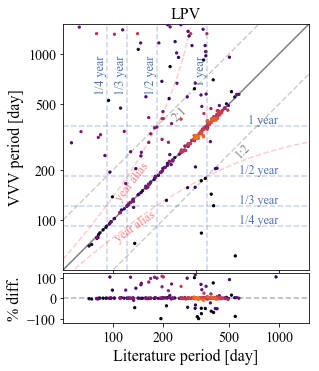

In [12]:
ax=make_one_to_one_plot(combo_dset[(combo_dset['var_class']=='LPV')
                                ],
                    xlim=[50.,1500.1],bins=60,literature='LPV',points=True,
                    year_alias_label=True)
plt.sca(ax[0]);
add_year_alias_red();
add_year_G();
# add_alias_lines_G();
add_double_lines(np.log10(265.),np.log10(220.))
plt.annotate('year alias',
             xy=(np.log10(100.), np.log10(1. / (1. / 100. + 1. / 365.) + 25.)),
             fontsize=12.,
             rotation=35.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('year alias',
             xy=(np.log10(100.), np.log10(1. / (1. / 100. - 1. / 365.) + 65.)),
             fontsize=12.,
             rotation=52.,
             xycoords='data',
             alpha=0.5,
             color='r')

plt.savefig('period_1to1_lpv.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10


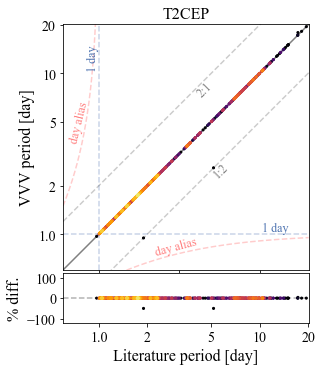

In [13]:
ax=make_one_to_one_plot(var_dataset[(var_dataset['var_class']=='T2CEP')],
                    xlim=[0.6,20.1],bins=100,literature='T2CEP',
                    points=True)
plt.sca(ax[0]);#add_alias_lines_G()
add_double_lines(np.log10(2.5),np.log10(4.))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 15., 1.)
plt.annotate('day alias',
             xy=(np.log10(2.2), np.log10(1. / (1. / .5 + 1. / 1.) + .53)),
             fontsize=12.,
             rotation=15.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(0.65), np.log10(1. / (1. / .5 - 1. / 1.) + 5.)),
             fontsize=12.,
             rotation=76.,
             xycoords='data',
             alpha=0.5,
             color='r')

plt.savefig('period_1to1_t2cep.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10


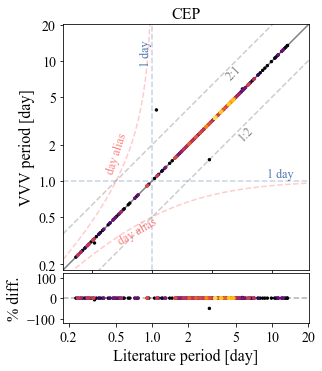

In [14]:
ax=make_one_to_one_plot(var_dataset[(var_dataset['var_class']=='CEP')],
                    xlim=[0.18,20.1],bins=100,literature='CEP',
                    points=True)
plt.sca(ax[0]);#add_alias_lines_G()
add_double_lines(np.log10(2.5),np.log10(4.))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 15., 1.)
plt.annotate('day alias',
             xy=(np.log10(.5), np.log10(1. / (1. / .5 + 1. / 1.) + .1)),
             fontsize=12.,
             rotation=30.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.4), np.log10(1. / (1. / .5 - 1. / 1.) + 1.2)),
             fontsize=12.,
             rotation=72.,
             xycoords='data',
             alpha=0.5,
             color='r')

plt.savefig('period_1to1_cep.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log10


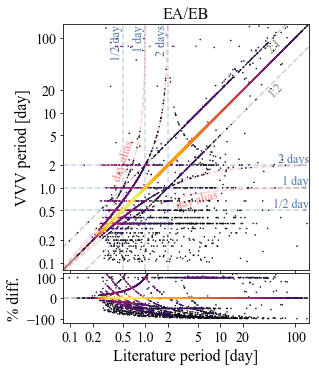

In [15]:
ax=make_one_to_one_plot(var_dataset[var_dataset['var_class']=='EA/EB'],
                    xlim=[0.08,150.1],bins=200,literature='EA/EB',
                    points=True)
plt.sca(ax[0])
add_double_lines(np.log10(20.5),np.log10(40.))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 150., 1.)

add_hline(.5)
add_vline(.5)
add_annotate('1/2 day', 150., .5)

add_hline(2.)
add_vline(2.)
add_annotate('2 days', 150., 2.)

plt.annotate('day alias',
             xy=(np.log10(2.5), np.log10(1. / (1. / .5 + 1. / 1.) + .4)),
             fontsize=12.,
             rotation=15.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.35), np.log10(1. / (1. / .5 - 1. / 1.) + 2.5)),
             fontsize=12.,
             rotation=72.,
             xycoords='data',
             alpha=0.5,
             color='r')
add_half_day_alias_red()
plt.savefig('period_1to1_eaeb.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log10


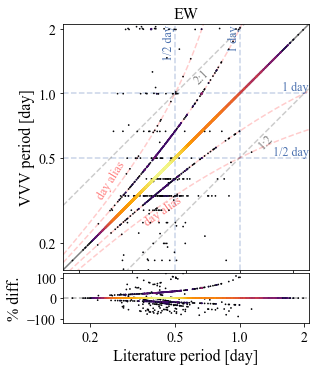

In [16]:
ax=make_one_to_one_plot(var_dataset[var_dataset['var_class']=='EW'],
                    xlim=[0.15,2.1],bins=100,literature='EW',
                    points=True)

plt.sca(ax[0])
add_double_lines(np.log10(0.6),np.log10(0.6))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 2.1, 1.)

add_hline(.5)
add_vline(.5)
add_annotate('1/2 day', 2.1, .5)

add_half_day_alias_red()

plt.annotate('day alias',
             xy=(np.log10(0.35), np.log10(1. / (1. / .5 + 1. / 1.) -0.025)),
             fontsize=12.,
             rotation=35.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.21), np.log10(1. / (1. / .5 - 1. / 1.) -0.55)),
             fontsize=12.,
             rotation=58.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.savefig('period_1to1_ew.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10
/data/jls/python3.5/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log10


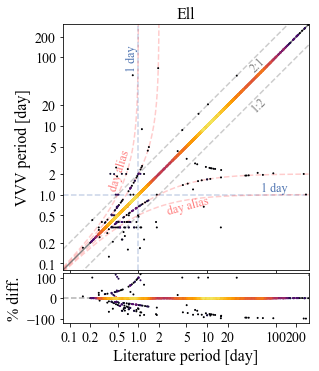

In [17]:
ax=make_one_to_one_plot(var_dataset[var_dataset['var_class']=='Ell'],
                    xlim=[0.08,300.1],bins=100,literature='Ell',
                    points=True)
plt.sca(ax[0])
add_double_lines(np.log10(20.5),np.log10(40.))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 150., 1.)

add_half_day_alias_red()

plt.annotate('day alias',
             xy=(np.log10(2.5), np.log10(1. / (1. / .5 + 1. / 1.) + .4)),
             fontsize=12.,
             rotation=15.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.35), np.log10(1. / (1. / .5 - 1. / 1.) + 2.5)),
             fontsize=12.,
             rotation=72.,
             xycoords='data',
             alpha=0.5,
             color='r')

plt.savefig('period_1to1_ell.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10


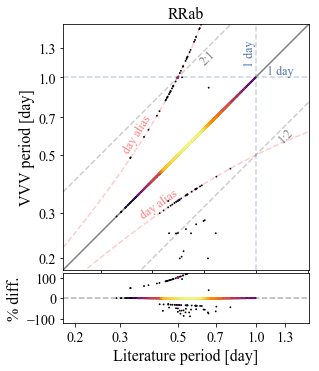

In [18]:
ax=make_one_to_one_plot(var_dataset[var_dataset['var_class']=='RRab'],
                    xlim=[0.18,1.6],bins=100,literature='RRab',points=True,
                    ticks=np.array([0.2,0.3,0.5,0.7,1.,1.3]))
plt.sca(ax[0])
add_double_lines(np.log10(0.6),np.log10(0.6))
add_day_alias_red()
add_hline(1.)
add_vline(1.)
add_annotate('1 day', 1.4, 1.)
plt.annotate('day alias',
             xy=(np.log10(0.35), np.log10(1. / (1. / .5 + 1. / 1.) + 0.015)),
             fontsize=12.,
             rotation=35.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.3), np.log10(1. / (1. / .5 - 1. / 1.) -0.33)),
             fontsize=12.,
             rotation=58.,
             xycoords='data',
             alpha=0.5,
             color='r')

plt.savefig('period_1to1_rrab.pdf',bbox_inches='tight',dpi=300)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in log10


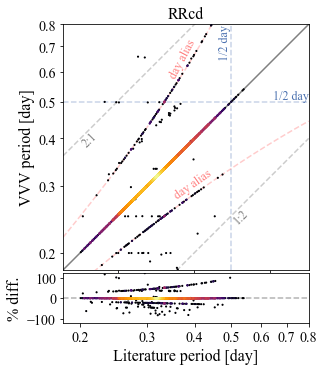

In [19]:
ax=make_one_to_one_plot(var_dataset[var_dataset['var_class']=='RRcd'],
                    xlim=[0.18,0.8],bins=100,literature='RRcd',points=True,
                    ticks=np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8]))
plt.sca(ax[0])
add_double_lines(np.log10(0.25),np.log10(0.2))
add_day_alias_red()
add_hline(.5)
add_vline(.5)
add_annotate('1/2 day', 0.8, .5)
plt.annotate('day alias',
             xy=(np.log10(0.35), np.log10(1. / (1. / .5 + 1. / 1.) -0.015)),
             fontsize=12.,
             rotation=35.,
             xycoords='data',
             alpha=0.5,
             color='r')
plt.annotate('day alias',
             xy=(np.log10(.34), np.log10(1. / (1. / .5 - 1. / 1.) -0.3)),
             fontsize=12.,
             rotation=62.,
             xycoords='data',
             alpha=0.5,
             color='r')

plt.savefig('period_1to1_rrcd.pdf',bbox_inches='tight',dpi=300)

In [2203]:
np.count_nonzero((var_dataset_full['var_class']=='MIRA')&(var_dataset_full['log10_fap_ls']>-10)),\
np.count_nonzero((var_dataset_full['var_class']=='MIRA')&(var_dataset_full['log10_fap_ls']<-10))

(0, 0)

In [40]:
import sys
sys.path.append('../')
from config import configuration
config = configuration()
config.request_password()

def get_lightcurve(sourceid):

    lcs = pd.DataFrame(sqlutilpy.get('''
                                select sourceid, 
                                unnest(mjdobs) as mjdobs,
                                unnest(mag) as mag,
                                unnest(emag) as emag,
                                unnest(filterid) as filterid,
                                unnest(chi) as chi,
                                unnest(ast_res_chisq) as ast_res_chisq,
                                unnest(ambiguous_match) as ambiguous_match  
                                from leigh_smith.virac2_ts_tmolnar_train_zyjhk where sourceid={0}'''.format(sourceid),
                     **config.wsdb_kwargs))
    
    if len(lcs)==0:

        lcs = pd.DataFrame(sqlutilpy.get('''
                                    select sourceid, 
                                    unnest(mjdobs) as mjdobs,
                                    unnest(mag) as mag,
                                    unnest(emag) as emag,
                                    unnest(filterid) as filterid,
                                    unnest(chi) as chi,
                                    unnest(ast_res_chisq) as ast_res_chisq,
                                    unnest(ambiguous_match) as ambiguous_match  
                                    from leigh_smith.virac2_ts_tmolnar_variables where sourceid={0}'''.format(sourceid),
                         **config.wsdb_kwargs))
    
    return lcs


 ·············


In [3]:
import sys
sys.path.append('../')
from fine_classif.feat_extract.compute_feats import correct_to_HJD, fourier_poly_chi2_fit_full, \
    retrieve_fourier_poly, LombScargle
from fine_classif.feat_extract.compute_feats import sigclipper, \
optimum_regularization, check_significant_second_minimum, find_phase_of_minimum

In [121]:
def plot_lightcurve(clss='RRab',ii=105,ax=None,reg=True):
    fltr = (combo_dset['class']==clss)&(combo_dset['prob']>0.9)&(combo_dset['ks_b_ivw_mean_mag']<14.)
    sid,per,clss=combo_dset['sourceid'].values[fltr][ii],period_fix(combo_dset).values[fltr][ii],combo_dset['class'].values[fltr][ii]
    cper = combo_dset['cat_period'].values[fltr][ii]
    prb = combo_dset['prob'].values[fltr][ii]
    print(combo_dset['var_class'].values[fltr][ii])
    print(combo_dset['lsq_period'].values[fltr][ii])
    print(combo_dset['significant_second_minimum'].values[fltr][ii])
    print(period_fix(combo_dset).values[fltr][ii])
    print(sid)
    print(cper)
    plot_lc_sid(sid, combo_dset['ra'].values[ii], combo_dset['dec'].values[ii],per,
                combo_dset['lsq_nterms'].values[ii], ax=ax, reg=reg)
    plt.title('%s, classif. prob.=%0.4f'%(clss,prb),loc='left',fontsize=18)
    
def plot_lc_sid(sid,ra,dec,per,nterms,ax=None,reg=True):
    lc=get_lightcurve(sid)
    clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<13.)&(lc['chi']<5.)
    lc = sigclipper(lc[clean])

    correct_to_HJD(lc,
                 ra,
                 dec)

    tt = lc['HJD'].values[np.argmin(np.abs(lc['mag'].values-np.nanpercentile(lc['mag'],98.)))]

    model = LombScargle(lc['HJD'].values-tt, lc['mag'].values, 
                        lc['emag'].values, normalization='standard')
    freq, power = model.autopower(maximum_frequency=10.)

    if ax is None:
        f,ax=plt.subplots(2,1,figsize=[5.,5.5],gridspec_kw={'height_ratios':[1.,0.3]})
    plt.sca(ax[0])
    plt.errorbar((((lc['HJD'].values-tt)%(2.*per))/per),
                 lc['mag'].values,
                 yerr=lc['emag'].values,fmt='o',color='gray',mew=0.5,mec='k')
#     plt.ylim(np.nanmean(lc['mag'].values)-0.3,np.nanmean(lc['mag'].values)+0.3)
    plt.gca().invert_yaxis()
    plt.xlim(-0.1,2.1)
    # plt.ylim(-0.5,0.5)
    plt.xlabel('Phase')
    plt.ylabel(r'$K_s$ [mag]')
#     nterms=combo_dset['lsq_nterms'].values[fltr][ii]
    opt_reg=0
    if reg:
        opt_reg=optimum_regularization(lc['mag'].values, lc['emag'].values)
    print(opt_reg)
    results_d = fourier_poly_chi2_fit_full(
                                             times=lc['HJD'].values-tt,
                                             mag=lc['mag'].values,
                                             err=lc['emag'].values,
                                             freq_dict={'freq_grid':np.array([1./per])},
                                             nterms=np.int64(nterms),
                                             npoly=2,
                                             regularization=opt_reg,
                                             time_zeropoint_poly=0.,
                                             regularize_by_trace = True,
                                             check_multiples=False, 
                                             use_power_of_2=False,
                                             return_period_error=False)
    print(find_phase_of_minimum(results_d))
    print(check_significant_second_minimum(results_d, 
                                          find_phase_of_minimum(results_d)))

    xx=np.linspace(-0.1*per,2.1*per,1000)
    FF = retrieve_fourier_poly(xx,
                               results_d)
    plt.plot(xx/per, FF,color='#FFA500',lw=3)

    plt.sca(ax[1])
    plt.plot(1./freq,power,color='#FFA500',lw=0.6)
    plt.xlim(np.max([per*0.2,0.1]),per*5.)
    plt.semilogx()

    plt.gca().xaxis.set_major_locator(LogLocator(subs=(0.5,1.,2.)))
    plt.gca().xaxis.set_major_formatter(ScalarFormatter())

    plt.axvline(per,color='gray',ls='dashed',alpha=0.5,lw=3,zorder=-10)
    plt.axvline(per/2.,color='gray',ls='dashed',alpha=0.2,lw=3,zorder=-10)

    plt.annotate('Period=%0.4f days'%per,xy=(0.98,0.95),ha='right',va='top',xycoords='axes fraction',
                fontsize=15)
    
    plt.xlabel('Period [days]')
    plt.ylabel('LS Power')
    plt.ylim(0.,)
    plt.subplots_adjust(hspace=0.32)
    return results_d
    # plt.plot((lc['mjdobs'][clean]%(cper)/cper),lc['mag'][clean]-np.nanmedian(lc['mag'][clean]),'.')

79907
0.12932649333351878
0.2586531 0.12932649333351878
0.001515322341100041
0.9579579579579579
False


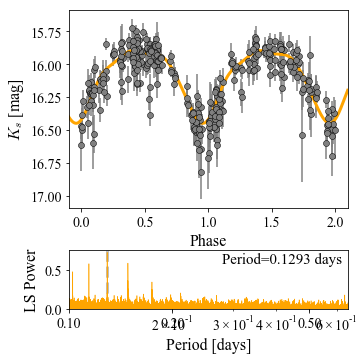

In [199]:
ii=215
fltr=(combo_dset['var_class']=='EA/EB')&~(combo_dset['significant_second_minimum'])\
    &(combo_dset['amp_0']/combo_dset['amp_1']>1)
print(np.count_nonzero(fltr))
sid=combo_dset['sourceid'].values[fltr][ii]
llperiod=combo_dset['lsq_period'].values[fltr][ii]
print(period_fix(combo_dset).values[fltr][ii])
nterms=combo_dset['lsq_nterms'].values[fltr][ii]
cp=combo_dset['cat_period'].values[fltr][ii]
print(cp,llperiod)
plot_lc_sid(sid,0.,0.,llperiod,nterms);



In [53]:
for ii in ['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']:
    fltr = (combo_dset['var_class']==ii)
    fltr2 = (var_dataset_full['var_class']==ii)
    print(ii,'%0.2f'%(100*np.count_nonzero(fltr)/np.count_nonzero(fltr2)))

EW 58.76
EA/EB 38.81
RRab 90.25
RRcd 62.59
Ell 61.87
CEP 90.36
T2CEP 81.22
LPV 24.35


In [20]:
for ii in ['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']:
    fltr = (np.abs(combo_dset['cat_period'].values/period_fix(combo_dset)-1)>0.1)\
    &(combo_dset['var_class']==ii)
    print(ii,'%0.2f'%(100*np.count_nonzero(fltr)/np.count_nonzero(combo_dset['var_class']==ii)))

/data/jls/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


EW 1.72
EA/EB 2.99
RRab 0.63
RRcd 4.17
Ell 1.69
CEP 1.00
T2CEP 0.55
LPV 51.09


In [263]:
for ii in ['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']:
    fltr = (np.abs(combo_dset['cat_period'].values/period_fix(combo_dset)-1)>0.2)\
    &(combo_dset['var_class']==ii)
    print(ii,'%0.2f'%(100*np.count_nonzero(fltr)/np.count_nonzero(combo_dset['var_class']==ii)))

/data/jls/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


EW 1.35
EA/EB 2.71
RRab 0.63
RRcd 4.11
Ell 1.59
CEP 1.00
T2CEP 0.55
LPV 48.91


In [219]:
for ii in ['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']:
    fltr = (np.abs(combo_dset['cat_period'].values/period_fix(combo_dset)-1)>0.2)\
    &(combo_dset['var_class']==ii)
    print(ii,'%0.2f'%(100*np.count_nonzero(fltr)/np.count_nonzero(combo_dset['var_class']==ii)))

/data/jls/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


EW 1.35
EA/EB 2.71
RRab 0.63
RRcd 4.11
Ell 1.59
CEP 1.00
T2CEP 0.55
LPV 48.91


In [217]:
for ii in ['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']:
    fltr = (np.abs(combo_dset['cat_period'].values/period_fix(combo_dset)-1)>0.2)\
    &(combo_dset['var_class']==ii)
    print(ii,'%0.2f'%(100*np.count_nonzero(fltr)/np.count_nonzero(combo_dset['var_class']==ii)))

/data/jls/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


EW 1.41
EA/EB 2.71
RRab 0.74
RRcd 4.16
Ell 1.59
CEP 1.67
T2CEP 1.47
LPV 48.91


In [176]:
for ii in ['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']:
    fltr = (np.abs(combo_dset['cat_period'].values/period_fix(combo_dset)-1)>0.2)\
    &(combo_dset['var_class']==ii)
    print(ii,'%0.2f'%(100*np.count_nonzero(fltr)/np.count_nonzero(combo_dset['var_class']==ii)))

EW 2.03
EA/EB 5.03
RRab 1.09
RRcd 4.86
Ell 3.69
CEP 2.33
T2CEP 2.39
LPV 48.91


In [2702]:
np.count_nonzero(np.abs(combo_dset['cat_period'][combo_dset['var_class']=='LPV']/(
         (combo_dset['lsq_period']/(1+ss))[combo_dset['var_class']=='LPV'])-1)>0.03)

213

In [7]:
import sys
sys.path.append('../../../')
from gaussian_process import run_gp_quick, plot_lc_GP

In [ ]:
lc = 
gp = run_gp_quick(lc, n_sho=n_sho, n_exp=n_exp, per_guess=bps, init_log_c=ilc)

In [2696]:
np.count_nonzero(
    np.abs(combo_dset['cat_period'][combo_dset['var_class']=='LPV']/
           period_fix(combo_dset)[combo_dset['var_class']=='LPV']-1)<0.01),np.count_nonzero(combo_dset['var_class']=='LPV')


(97, 368)

[]

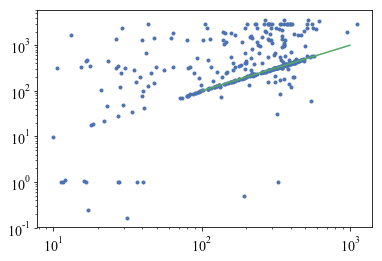

In [2691]:
plt.plot(combo_dset['cat_period'][combo_dset['var_class']=='LPV'],
         period_fix(combo_dset)[combo_dset['var_class']=='LPV'],'.')
xx = np.linspace(100.,1000.)
plt.plot(xx, xx)
plt.semilogy()
plt.semilogx()

LPV
681.3930734060734
False
340.6965367030367
9303004041949
116.70846606854742
0.0005654880420770958
0.974974974974975
False


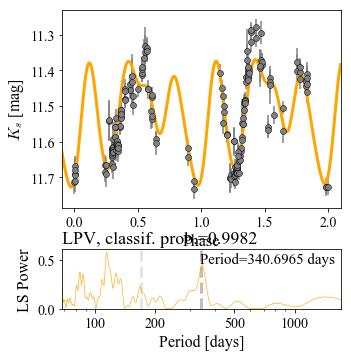

In [122]:
import sqlutilpy
from matplotlib.ticker import LogLocator, ScalarFormatter
plot_lightcurve('LPV',145,reg=True);

In [9]:
sys.path.append('../../../../mira_project/')
sys.path.append('../../../../')
from find_analyse_variables import generate_results_gp

/data/jls/python3.5/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: Python 3.5 support will be dropped in the next release ofcryptography. Please upgrade your Python.
  from cryptography.utils import int_from_bytes


In [78]:
full_periods = np.nan*np.zeros(np.count_nonzero(combo_dset['var_class']=='LPV'))
for i, (per, sid) in enumerate(
                      zip(combo_dset['lsq_period'][combo_dset['var_class']=='LPV'],
                      combo_dset['sourceid'][combo_dset['var_class']=='LPV'])):
    lc=get_lightcurve(sid)
    if len(lc)==0:
        continue
    clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<11.829)&(~((lc['chi']>5.)&(lc['mag']<13.2)))
    lc = sigclipper(lc[clean])
    lc['error']=lc['emag']
    if len(lc)>2:
        gpp,gpprops, lcprops, dll, dllG, rchi, delta_aic, delta_bic=\
            generate_results_gp(lc,[per])
        full_periods[i]=gpprops['period_1']

/data/jls/python3.5/site-packages/numpy/core/fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[]

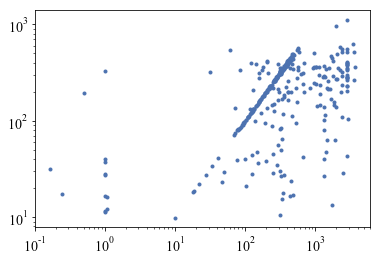

In [94]:
plt.plot(period_fix(combo_dset[combo_dset['var_class']=='LPV']), 
        combo_dset['cat_period'].values[combo_dset['var_class']=='LPV'],'.')
plt.semilogx()
plt.semilogy()

/data/jls/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


(-3, 3)

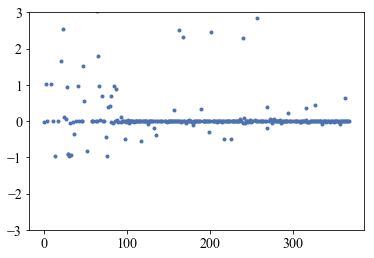

In [98]:
plt.plot(full_periods/(combo_dset['cat_period'].values[combo_dset['var_class']=='LPV'])-1,'.')
plt.ylim(-3,3)

[]

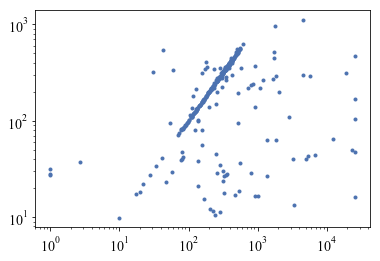

In [99]:
plt.plot(full_periods, 
        combo_dset['cat_period'].values[combo_dset['var_class']=='LPV'],'.')
plt.semilogx()
plt.semilogy()

In [86]:
np.count_nonzero(np.abs(full_periods/
         combo_dset[combo_dset['var_class']=='LPV']['cat_period'].values-1)<0.1), np.count_nonzero(combo_dset['var_class']=='LPV')

/data/jls/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/data/jls/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


(255, 368)

In [76]:
np.count_nonzero(np.abs(period_fix(combo_dset[combo_dset['var_class']=='LPV']).values/
         combo_dset[combo_dset['var_class']=='LPV']['cat_period'].values-1)<0.1)

/data/jls/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


182

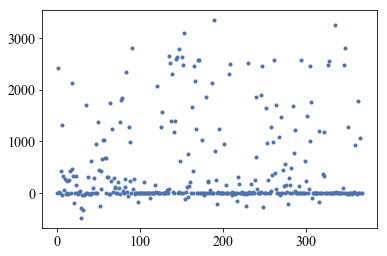

In [74]:
plt.plot(period_fix(combo_dset[combo_dset['var_class']=='LPV']).values-
         combo_dset[combo_dset['var_class']=='LPV']['cat_period'].values,'.')

In [45]:
full_periods[:5], \
combo_dset[combo_dset['var_class']=='LPV']['lsq_period'].values[:5], \
combo_dset[combo_dset['var_class']=='LPV']['cat_period'].values[:5], \
combo_dset[combo_dset['var_class']=='LPV']['sourceid'].values[:5]

(array([ 78.59400608, 808.36676213,  46.46456024,   9.91162182,
        310.78707978]),
 array([  78.41914875, 2447.98078406,   46.38309251,    9.90975455,
         455.78725308]),
 array([81.22  , 28.919 , 23.02  ,  9.9083, 23.479 ]),
 array([8451026008493, 8573904014926, 8618963016029, 8688588016960,
        8745943000130]))

2.28 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


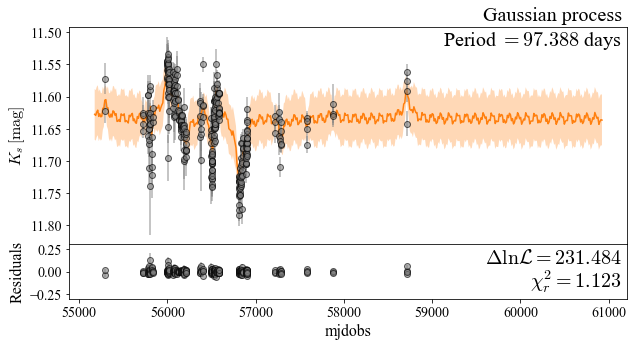

In [69]:
%%timeit -n 1 -r 1
lc=get_lightcurve(8573904014926)
clean = (lc['filterid']==5)&(lc['ambiguous_match']==0)&(lc['ast_res_chisq']<11.829)#&(~((lc['chi']>5.)&(lc['mag']<13.2)))
lc = sigclipper(lc[clean])
lc['error']=lc['emag']
if len(lc)>2:
#     gpp,gpprops, lcprops, dll, dllG, rchi, delta_aic, delta_bic=generate_results_gp(lc,[28.9])
    gpp=run_gp_quick(lc, 23.0,init_log_c=-10, n_sho=2, n_exp=1)#, n_exp=1, n_sho=1)
    plot_lc_GP(lc, gpp);

(10.0, 1000.0)

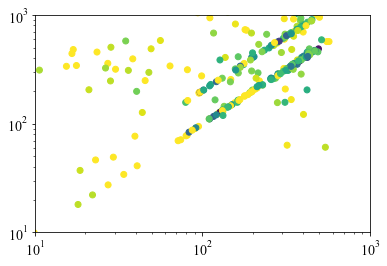

In [2274]:

plt.scatter(combo_dset['cat_period'][combo_dset['var_class']=='LPV'],
           period_fix(combo_dset)[combo_dset['var_class']=='LPV'],
           c=np.log10((combo_dset['amp_0']/combo_dset['amp_1'])[combo_dset['var_class']=='LPV']),
           vmax=0.)
plt.semilogy()
plt.semilogx()
plt.xlim(10.,1000.)
plt.ylim(10.,1000.)

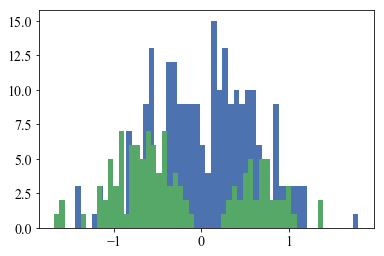

In [2266]:
plt.hist(np.log10((combo_dset['amp_0']/combo_dset['amp_1'])[combo_dset['var_class']=='LPV'])
         [np.abs(combo_dset['cat_period']/period_fix(combo_dset)-1)>0.05],
         bins=50
        );
plt.hist(np.log10((combo_dset['amp_0']/combo_dset['amp_1'])[combo_dset['var_class']=='LPV'])
         [np.abs(combo_dset['cat_period']/period_fix(combo_dset)-1)<0.05],
         bins=50
        );

EW
0.5079116404943643
0.4754754754754755
True
EA/EB
0.7224785232126179
0.978978978978979
True
RRab
0.6613174167262793
0.998998998998999
False
RRcd
0.3720207761315188
0.96996996996997
False
Ell
14.682239391378745
0.991991991991992
True
CEP
3.5371671481319553
0.04104104104104104
False
T2CEP
1.8340154839670366
0.03403403403403403
False
LPV
336.45707931727793
0.9169169169169169
False


/data/jls/python3.5/site-packages/matplotlib/axis.py:1081: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/data/jls/python3.5/site-packages/matplotlib/axis.py:1091: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


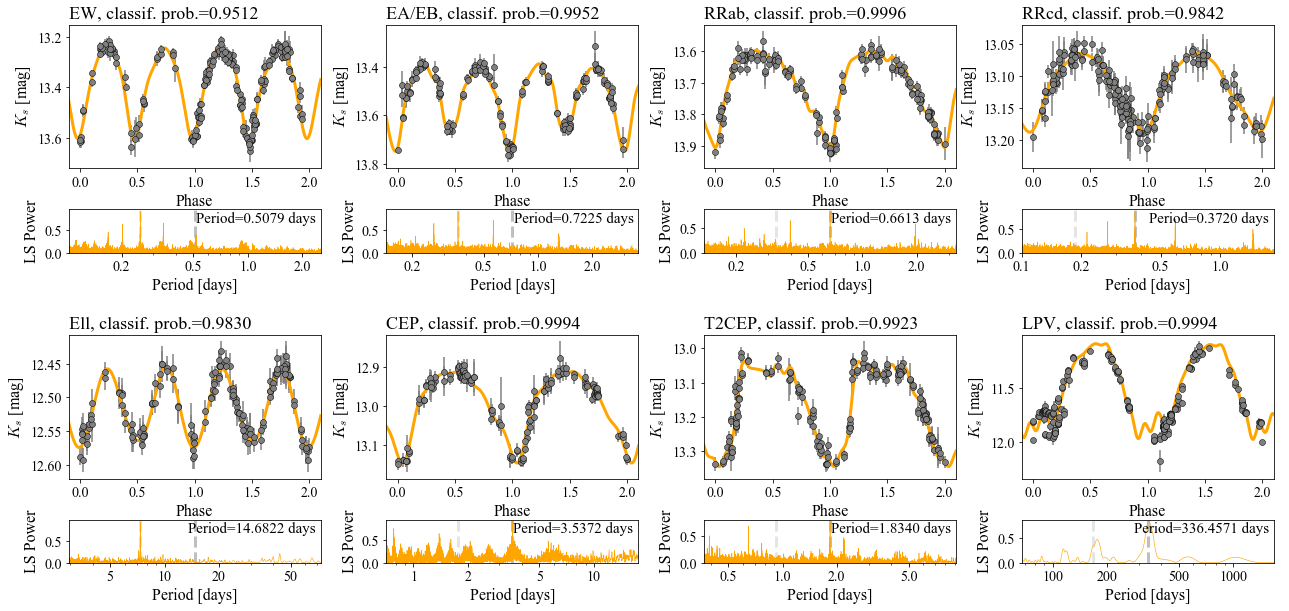

In [2507]:
f,ax=plt.subplots(5,4,figsize=[24.*0.9,5.5*2*0.9],gridspec_kw={'height_ratios':[1.,0.3,0.0,1.,0.3]})
for ii in ax[2]:
    ii.axis('off')
plot_lightcurve('EW',51,ax[:2,0])
plot_lightcurve('EA/EB',51,ax[:2,1])
plot_lightcurve('RRab',51,ax[:2,2])
plot_lightcurve('RRcd',58,ax[:2,3])
plot_lightcurve('Ell',52,ax[3:5,0])
plot_lightcurve('CEP',53,ax[3:5,1])
plot_lightcurve('T2CEP',53,ax[3:5,2])
plot_lightcurve('LPV',-14,ax[3:5,3])
plt.subplots_adjust(wspace=0.26,hspace=0.55)
plt.savefig('training_set_examples.pdf',bbox_inches='tight')

In [46]:
np.count_nonzero((var_dataset_full['var_class']!='CONST'))

405207

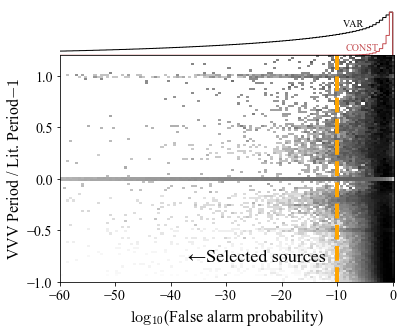

In [58]:
from plotting_general import col_norm, row_norm
f,a=plt.subplots(2,1,figsize=[6.,5.],
                gridspec_kw={'height_ratios':[0.2,1.]},
                sharex=True)
plt.subplots_adjust(hspace=0.)
plt.sca(a[0]);plt.axis('off')
fltr = (var_dataset_full['var_class']!='CONST')
plt.hist(var_dataset_full['log10_fap_ls'][fltr],
        range=[-360,0],histtype='step',bins=np.int(100/60*360),
        lw=1,color='k',cumulative=True,density=True)
fltr = (var_dataset_full['var_class']=='CONST')
plt.hist(var_dataset_full['log10_fap_ls'][fltr],
        range=[-360,0],histtype='step',bins=np.int(100/60*360),
        lw=1,color=sns.color_palette()[2],cumulative=True,density=True)
# plt.xlim(-60.,0.)
plt.ylim(0.,)
plt.annotate('CONST',xy=(-8.4,0.12),color=sns.color_palette()[2])
plt.annotate('VAR',xy=(-9,0.66),color='k')
# plt.semilogy()
plt.sca(a[1])
fltr = (var_dataset_full['var_class']!='CONST')
row_norm(var_dataset_full['log10_fap_ls'][fltr],
         (period_fix(var_dataset_full)/var_dataset_full['cat_period']-1)[fltr],
        range=[[-60,0.3],[-1.,1.2]],bins=110,norm=LogNorm(),
        cmap=plt.cm.Greys);
import seaborn as sns
plt.axvline(-10,ls='dashed',color='#FFA500',lw=4)
plt.annotate('←Selected sources',xy=(-12,-0.8),ha='right',
            fontsize=18)
plt.xlabel('$\log_{10}$(False alarm probability)')
plt.ylabel(r'VVV Period / Lit. Period$-1$')
plt.savefig('log10fapcut.pdf',bbox_inches='tight')

In [49]:
ew = var_dataset[(var_dataset['var_class']=='EW')].reset_index(drop=True)
eaebNS = var_dataset[(var_dataset['var_class']=='EA/EB')&
                  ~(var_dataset['significant_second_minimum'])].reset_index(drop=True)
eaebS = var_dataset[(var_dataset['var_class']=='EA/EB')&
                  (var_dataset['significant_second_minimum'])].reset_index(drop=True)

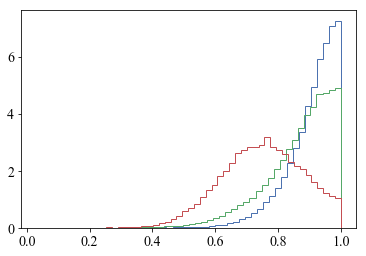

In [636]:
plt.hist(ew['peak_ratio_data'],density=True,histtype='step',bins=50)
plt.hist(eaebNS['peak_ratio_data'],density=True,histtype='step',bins=50);
plt.hist(eaebS['peak_ratio_data'],density=True,histtype='step',bins=50);

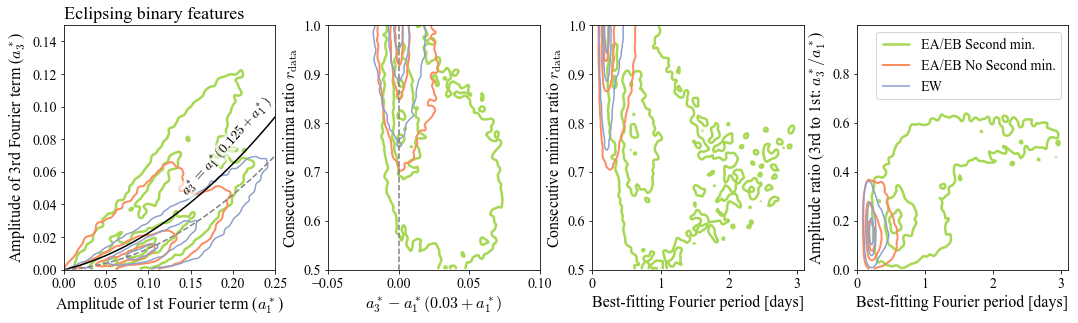

In [51]:
f,a=plt.subplots(1,4,figsize=[18.,4.5])

plt.sca(a[0])
for ii,(lbl,dd) in enumerate(zip(['EA/EB','E2','EW'],[eaebS,eaebNS,ew])):
    nn, x, y = np.histogram2d(
        dd['amp_double_1'],
        dd['amp_double_3']
        ,bins=200,range=[[0.,0.3],[0.,0.15]])
    import seaborn as sns
    from scipy.ndimage import gaussian_filter
    colors = [sns.color_palette('Set2')[4],sns.color_palette('Set2')[1]
             ,sns.color_palette('Set2')[2]]
    nn=gaussian_filter(nn.T,2.)
    c = plt.contour(.5*(x[1:]+x[:-1]),.5*(y[1:]+y[:-1]),nn,
                         origin='lower',
                         colors=[colors[ii]],
                         label=lbl,
                         contours=10,
                           levels=[np.max(nn)/10.,np.max(nn)/2.,np.max(nn)/1.2],
                   linewidths=2.5-ii*0.5)
    c.collections[0].set_label(lbl)
# plt.legend()
xx = np.linspace(0.,0.4)
plt.plot(xx,xx*(0.125+xx),color='k')
plt.xlim(0.,0.25)
plt.ylim(0.,0.15)
plt.xlabel('Amplitude of 1st Fourier term ($a^*_1$)')
plt.ylabel('Amplitude of 3rd Fourier term ($a^*_3$)')
plt.plot(xx,xx*(0.03+xx),color='gray',ls='dashed')
t=plt.annotate('$a^*_3=a^*_1(0.125+a^*_1)$',xy=(0.134,0.1005),rotation=48,fontsize=14)
t.set_bbox(dict(facecolor='white', alpha=0.6, edgecolor='None',boxstyle='square,pad=0'))
plt.sca(a[1])
for ii,(lbl,dd) in enumerate(zip(['EA/EB Second min.','EA/EB No Second min.','EW'],[eaebS,eaebNS,ew])):
    nn, x, y = np.histogram2d(
        dd['amp_double_3']-dd['amp_double_1']*(0.03+dd['amp_double_1']),
        dd['peak_ratio_data']
        ,bins=200,range=[[-0.05,0.1],[0.5,1.]])
    import seaborn as sns
    from scipy.ndimage import gaussian_filter
    colors = [sns.color_palette('Set2')[4],sns.color_palette('Set2')[1]
             ,sns.color_palette('Set2')[2]]
    nn=gaussian_filter(nn.T,2.)
    c = plt.contour(.5*(x[1:]+x[:-1]),.5*(y[1:]+y[:-1]),nn,
                         origin='lower',
                         colors=[colors[ii]],
                         label=lbl,
                         contours=10,
                           levels=[np.max(nn)/10.,np.max(nn)/2.,np.max(nn)/1.2],
                   linewidths=2.5-ii*0.5)
    c.collections[0].set_label(lbl)
plt.xlabel('$a^*_3-a^*_1(0.03+a^*_1)$')
plt.ylabel(r'Consecutive minima ratio $r_\mathrm{data}$')
# plt.legend()
plt.axvline(0.,color='gray',ls='dashed')

plt.ylim(0.5,1.)
plt.xlim(-0.05,0.1)

plt.sca(a[2])
for ii,(lbl,dd) in enumerate(zip(['EA/EB Second min.','EA/EB No Second min.','EW'],[eaebS,eaebNS,ew])):
    nn, x, y = np.histogram2d(
        dd['lsq_period'],
        dd['peak_ratio_data']
        ,bins=200,range=[[0.,3.],[0.5,1.]])
    import seaborn as sns
    from scipy.ndimage import gaussian_filter
    colors = [sns.color_palette('Set2')[4],sns.color_palette('Set2')[1]
             ,sns.color_palette('Set2')[2]]
    nn=gaussian_filter(nn.T,2.)
    c = plt.contour(.5*(x[1:]+x[:-1]),.5*(y[1:]+y[:-1]),nn,
                         origin='lower',
                         colors=[colors[ii]],
                         label=lbl,
                         contours=10,
                           levels=[np.max(nn)/10.,np.max(nn)/2.,np.max(nn)/1.2],
                   linewidths=2.5-ii*0.5)
    c.collections[0].set_label(lbl)
plt.xlabel('Best-fitting Fourier period [days]')
plt.ylabel(r'Consecutive minima ratio $r_\mathrm{data}$')
# plt.legend()
plt.xlim(0.,3.1)
plt.ylim(0.5,1.)

plt.sca(a[3])
for ii,(lbl,dd) in enumerate(zip(['EA/EB Second min.','EA/EB No Second min.','EW'],[eaebS,eaebNS,ew])):
    nn, x, y = np.histogram2d(
        dd['lsq_period'],
        dd['amp_double_3']/dd['amp_double_1'],
        bins=200,range=[[0.,3.],[0.,1.]])
    import seaborn as sns
    from scipy.ndimage import gaussian_filter
    colors = [sns.color_palette('Set2')[4],sns.color_palette('Set2')[1]
             ,sns.color_palette('Set2')[2]]
    nn=gaussian_filter(nn.T,2.)
    c = plt.contour(.5*(x[1:]+x[:-1]),.5*(y[1:]+y[:-1]),nn,
                         origin='lower',
                         colors=[colors[ii]],
                         label=lbl,
                         contours=10,
                           levels=[np.max(nn)/10.,np.max(nn)/2.,np.max(nn)/1.2],
                   linewidths=2.5-ii*0.5)
    c.collections[0].set_label(lbl)
plt.legend()
plt.xlabel('Best-fitting Fourier period [days]')
plt.ylabel('Amplitude ratio (3rd to 1st: $a^*_3/a^*_1$)')
plt.xlim(0.,3.1)
plt.ylim(0.,)
plt.sca(a[0])
plt.title('Eclipsing binary features',loc='left',fontsize=18)
plt.subplots_adjust(wspace=0.25)
plt.savefig('eclipsing_features.pdf',bbox_inches='tight')

## Period distribution

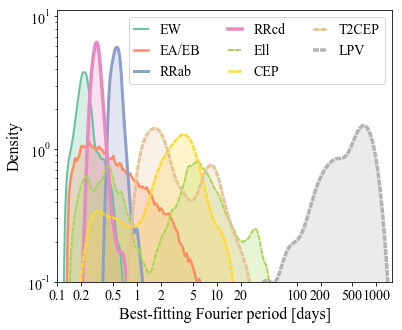

In [103]:
plt.figure(figsize=[6.,5.])
for ii,ll in enumerate(['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']):
#     plt.hist(np.log10(var_dataset['lsq_period'][var_dataset['var_class']==ll]),bins=100,
#             color=sns.color_palette('Set2')[ii],histtype='step',lw=2,density=True,
#             range=[-1,3.2]);
    fll=np.log10(var_dataset['lsq_period'][
        (var_dataset['var_class']==ll)&(var_dataset['lsq_period']<3000.)])
    ls='solid'
    if ii>3:
        ls=(0,(6/(2+(ii%4)*0.5),1/(2+(ii%4)*0.5)))
    sns.kdeplot(fll[(fll>np.nanpercentile(fll,1.))&(fll<np.nanpercentile(fll,99.5))],
            color=sns.color_palette('Set2')[ii],lw=2+(ii%4)*0.5,
            clip=[-2,3],label=ll,bw=(1./np.count_nonzero(fll))**.4,
               shade=0.01,ls=ls)
plt.semilogy()
plt.ylim(0.1,)
plt.xlim(-1,3.2)
plt.legend(ncol=3,handlelength=1)
plt.xlabel('Best-fitting Fourier period [days]')

ticks=[0.1,0.2,0.5,1,2,5,10,20,100,200,500,1000]
plt.xticks(np.log10(ticks),ticks);
plt.ylabel('Density')

plt.savefig('period_dist.pdf',bbox_inches='tight')

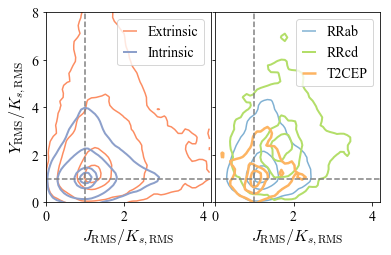

In [94]:
fltr1=np.any([(var_dataset['var_class']==ll) for ll in ['EW','EA/EB','Ell']],
            axis=0)
fltr2=np.any([(var_dataset['var_class']==ll) for ll in ['RRab','RRcd','CEP','T2CEP','LPV']],
            axis=0)
fltr3=np.any([(var_dataset['var_class']==ll) for ll in ['RRcd']],
            axis=0)

fig,ax=plt.subplots(1,2,figsize=[6.,3.5],sharex=True,sharey=True)
for jj, ss in enumerate(['Y_model']):
    plt.sca(ax[0])
    for ii,(fltr,lbl) in enumerate(zip([fltr2,fltr1],['Extrinsic','Intrinsic'])):
        nn, x, y = np.histogram2d(
                var_dataset['J_model'][fltr],
                   var_dataset[ss][fltr],
                  range=[[-0.2,4.2],[-0.2,8.2]],bins=50);
        import seaborn as sns
        from scipy.ndimage import gaussian_filter
        colors = [sns.color_palette('Set2')[4],sns.color_palette('Set2')[1]
                 ,sns.color_palette('Set2')[2]]
        nn=gaussian_filter(nn.T,1.)
        c = plt.contour(.5*(x[1:]+x[:-1]),.5*(y[1:]+y[:-1]),nn,
                             origin='lower',
                             colors=[colors[ii+1]],
                             label=lbl,
                             contours=10,
                               levels=[np.max(nn)/50.,np.max(nn)/10.,
                                       np.max(nn)/2.,np.max(nn)*0.8],
                       linewidths=1.5+ii*0.5)
        c.collections[0].set_label(lbl)
    plt.axhline(1.,color='gray',ls='dashed')
    plt.axvline(1.,color='gray',ls='dashed')
    plt.legend(handlelength=1)
plt.xlabel(r'$J_\mathrm{RMS}/K_{s,\mathrm{RMS}}$')
plt.ylabel(r'$Y_\mathrm{RMS}/K_{s,\mathrm{RMS}}$')

for jj, ss in enumerate(['Y_model']):
    plt.sca(ax[1])
    for ii,f in enumerate(['RRab','RRcd','T2CEP']):
        fltr = (var_dataset['var_class']==f)
        nn, x, y = np.histogram2d(
                var_dataset['J_model'][fltr],
                   var_dataset[ss][fltr],
                  range=[[-0.2,4.2],[-0.2,8.2]],bins=50);
        import seaborn as sns
        from scipy.ndimage import gaussian_filter
        colors = [sns.color_palette('Set2')[4],sns.color_palette('Set2')[1]
                 ,sns.color_palette('Set2')[2]]
        nn=gaussian_filter(nn.T,1.)
        indx=[4,6,5]
        c = plt.contour(.5*(x[1:]+x[:-1]),.5*(y[1:]+y[:-1]),nn,
                             origin='lower',
                             colors=[sns.color_palette('Set3')[indx[ii]]],
                             label=lbl,
                             contours=10,
                               levels=[np.max(nn)/10.,
                                       np.max(nn)/2.,
                                       np.max(nn)*0.8],
                       linewidths=1.5+ii*0.5)
        c.collections[0].set_label(f)
    plt.axhline(1.,color='gray',ls='dashed')
    plt.axvline(1.,color='gray',ls='dashed')
    plt.xlim(0.,4.2)
    plt.ylim(0.,8.)
    plt.legend(handlelength=1)
plt.subplots_adjust(wspace=0.02)
plt.xlabel(r'$J_\mathrm{RMS}/K_{s,\mathrm{RMS}}$')
plt.savefig('colour_scatter_measure.pdf',bbox_inches='tight')

/data/jls/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'contours', 'label'
  s)


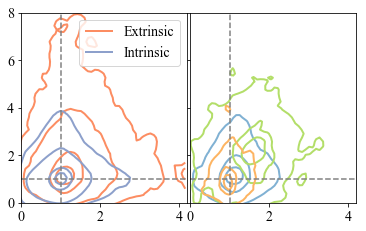

In [1226]:
fltr1=np.any([(var_dataset['var_class']==ll) for ll in ['EW','EA/EB','Ell']],
            axis=0)
fltr2=np.any([(var_dataset['var_class']==ll) for ll in ['RRab','RRcd','CEP','T2CEP','LPV']],
            axis=0)
fltr3=np.any([(var_dataset['var_class']==ll) for ll in ['RRcd']],
            axis=0)

fig,ax=plt.subplots(1,2,figsize=[6.,3.5],sharex=True,sharey=True)
for jj, ss in enumerate(['Y_scale']):
    plt.sca(ax[0])
    for ii,(fltr,lbl) in enumerate(zip([fltr2,fltr1],['Extrinsic','Intrinsic'])):
        nn, x, y = np.histogram2d(
                var_dataset['J_scale'][fltr],
                   var_dataset[ss][fltr],
                  range=[[-0.2,4.2],[-0.2,8.2]],bins=50);
        import seaborn as sns
        from scipy.ndimage import gaussian_filter
        colors = [sns.color_palette('Set2')[4],sns.color_palette('Set2')[1]
                 ,sns.color_palette('Set2')[2]]
        nn=gaussian_filter(nn.T,1.)
        c = plt.contour(.5*(x[1:]+x[:-1]),.5*(y[1:]+y[:-1]),nn,
                             origin='lower',
                             colors=[colors[ii+1]],
                             label=lbl,
                             contours=10,
                               levels=[np.max(nn)/50.,np.max(nn)/10.,
                                       np.max(nn)/2.,np.max(nn)*0.8],
                       linewidths=2)
        c.collections[0].set_label(lbl)
    plt.axhline(1.,color='gray',ls='dashed')
    plt.axvline(1.,color='gray',ls='dashed')
    plt.legend()

for jj, ss in enumerate(['Y_scale']):
    plt.sca(ax[1])
    for ii,f in enumerate(['RRab','RRcd','T2CEP']):
        fltr = (var_dataset['var_class']==f)
        nn, x, y = np.histogram2d(
                var_dataset['J_scale'][fltr],
                   var_dataset[ss][fltr],
                  range=[[-0.2,4.2],[-0.2,8.2]],bins=50);
        import seaborn as sns
        from scipy.ndimage import gaussian_filter
        colors = [sns.color_palette('Set2')[4],sns.color_palette('Set2')[1]
                 ,sns.color_palette('Set2')[2]]
        nn=gaussian_filter(nn.T,1.)
        indx=[4,6,5]
        c = plt.contour(.5*(x[1:]+x[:-1]),.5*(y[1:]+y[:-1]),nn,
                             origin='lower',
                             colors=[sns.color_palette('Set3')[indx[ii]]],
                             label=lbl,
                             contours=10,
                               levels=[np.max(nn)/10.,
                                       np.max(nn)/2.,
                                       np.max(nn)*0.8],
                       linewidths=2)
    plt.axhline(1.,color='gray',ls='dashed')
    plt.axvline(1.,color='gray',ls='dashed')
    plt.xlim(0.,4.2)
    plt.ylim(0.,8.)
plt.subplots_adjust(wspace=0.02)


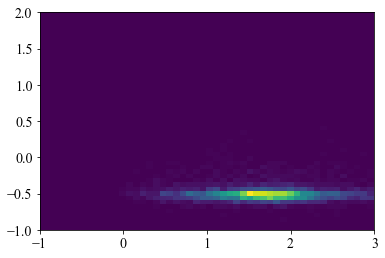

In [913]:
plt.hist2d(var_dataset['J_model'][var_dataset['var_class']=='RRcd'],
            np.log10(var_dataset['lsq_period'][var_dataset['var_class']=='RRcd']),
          range=[[-1,3],[-1,2]],bins=50);
# sns.kdeplot(var_dataset['J_model'][var_dataset['class']=='CEP'],clip=[-1,3])

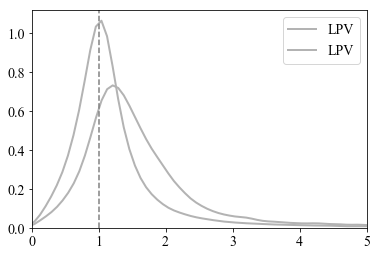

In [957]:
fltr=np.any([(var_dataset['var_class']==ll) for ll in ['EW','EA/EB','Ell']],axis=0)
sns.kdeplot(var_dataset['J_model']
        [fltr],
            color=sns.color_palette('Set2')[ii],lw=2,
            clip=[0,10],label=ll,bw=0.1);

fltr=np.any([(var_dataset['var_class']==ll) for ll in ['RRab','RRcd','CEP','T2CEP','LPV']],axis=0)
sns.kdeplot(var_dataset['J_model']
        [fltr],
            color=sns.color_palette('Set2')[ii],lw=2,
            clip=[0,10],label=ll,bw=0.1);
plt.ylim(0.,)
plt.xlim(0.,5.)
plt.axvline(1.,color='gray',ls='dashed')

In [ ]:
for ii,ll in enumerate(['EW','EA/EB','Ell']):
fltr=(var_dataset['var_class']==ll) for ll in ['EW','EA/EB','Ell']
    'RRab','RRcd','CEP','T2CEP','LPV']):
    sns.kdeplot(var_dataset['J_scale']
        [(var_dataset['var_class']==ll)],
            color=sns.color_palette('Set2')[ii],lw=2,
            clip=[0,10],label=ll,bw=0.1);
plt.legend(ncol=3,handlelength=1)
# plt.semilogy()
plt.ylim(0.,)
plt.xlim(0.,5.)
plt.axvline(1.,color='gray',ls='dashed')
# plt.xlim(-1,0)

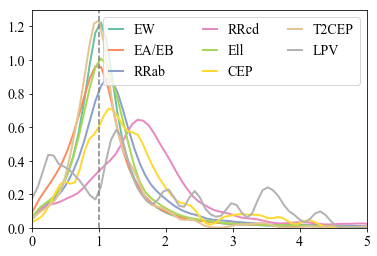

In [948]:
for ii,ll in enumerate(['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']):
#     plt.hist(np.log10(var_dataset['lsq_period'][var_dataset['var_class']==ll]),bins=100,
#             color=sns.color_palette('Set2')[ii],histtype='step',lw=2,density=True,
#             range=[-1,3.2]);
    sns.kdeplot(var_dataset['J_scale']
        [(var_dataset['var_class']==ll)],
            color=sns.color_palette('Set2')[ii],lw=2,
            clip=[0,10],label=ll,bw=0.1);
plt.legend(ncol=3,handlelength=1)
# plt.semilogy()
plt.ylim(0.,)
plt.xlim(0.,5.)
plt.axvline(1.,color='gray',ls='dashed')
# plt.xlim(-1,0)

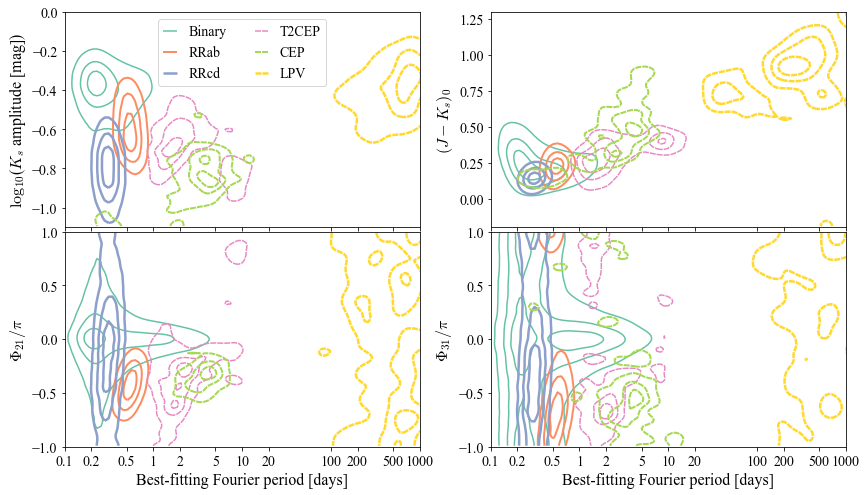

In [92]:
fig,ax=plt.subplots(2,2,figsize=[14.,8.],sharex=True)
plt.subplots_adjust(hspace=0.02)
ax = ax.flatten()
for jj,(col,ylbl,yrange) in enumerate(
    zip(['amplitude','JK_col','phi2_phi0','phi3_phi0'],
        [r'$\log_{10}$($K_s$ amplitude [mag])', r'$(J-K_s)_0$',
        r'$\Phi_{21}/\pi$',r'$\Phi_{31}/\pi$'],
        [[-1.1,-0.0],[-0.2,1.3],[-1,1],[-1,1]])):
    plt.sca(ax[jj])
    for ii,(f,lbl) in enumerate(
        zip([['EA/EB','EW','Ell'],['RRab'],['RRcd'],['T2CEP'],['CEP'],['LPV']],
        ['Binary','RRab','RRcd','T2CEP','CEP','LPV'])):
        fltr=np.any([(var_dataset['var_class']==ll) for ll in f],axis=0)
        YY = var_dataset[col][fltr]
        fold=True
        if col=='JK_col' or col=='HK_col' or col=='amplitude':
            fold=False
        if col=='amplitude':
            YY = np.log10(YY)
        if fold:
            YY = (YY - 2*np.pi*(YY>np.pi))/np.pi
        nn, x, y = np.histogram2d(
                np.log10(var_dataset['lsq_period'][fltr]),
                YY,
                  range=[[-1+(f[0]=='LPV')*1.5,3.3],yrange],bins=100);
        import seaborn as sns
        from scipy.ndimage import gaussian_filter
        colors = [sns.color_palette('Set2')[4],sns.color_palette('Set2')[1]
                 ,sns.color_palette('Set2')[2]]
        nn=gaussian_filter(nn.T,2.+2.*(f[0]=='LPV'))
        c = plt.contour(.5*(x[1:]+x[:-1]),.5*(y[1:]+y[:-1]),nn,
                             origin='lower',
                             colors=[sns.color_palette('Set2')[ii]],
                             label=lbl,
                             contours=10,
                               levels=[
    #                                np.max(nn)/10.,
                                       np.max(nn)/5.,
                                       np.max(nn)/2.,
                                       np.max(nn)*0.8],
                       linewidths=1.5+(ii%3)*0.5)
        c.collections[0].set_label(lbl)
        if ii>2:
            for cp in c.collections:
                cp.set_dashes([(0, (6.0/(1.5+(ii%3)*0.5), 1.0/(1.5+(ii%3)*0.5)))])
        if jj==0:
            plt.legend(ncol=2,loc='upper center',handlelength=1.)
        plt.ylabel(ylbl)
        plt.ylim(*yrange)

        ticks=[0.1,0.2,0.5,1,2,5,10,20,100,200,500,1000]
        plt.xticks(np.log10(ticks),ticks);
        if jj>1:
            plt.xlabel('Best-fitting Fourier period [days]')
        plt.xlim(-1,3)
plt.savefig('period_amplitude.pdf',bbox_inches='tight')

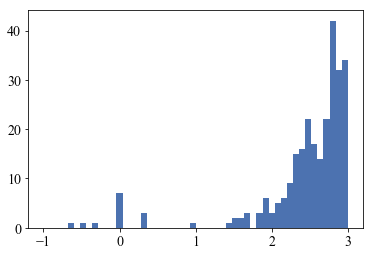

In [1177]:
plt.hist(np.log10(var_dataset['lsq_period'][var_dataset['var_class']=='LPV']),
        range=[-1,3],bins=50);

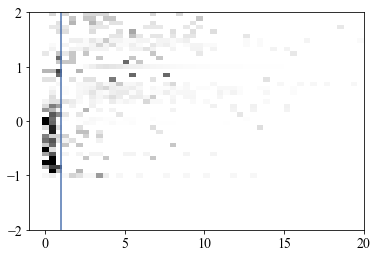

In [1343]:
fltr = (var_dataset['var_class']=='EW')
row_norm((var_dataset['amp_0']/var_dataset['amp_1'])[fltr],
           (var_dataset['cat_period']/
            ((1+1.*np.float64(var_dataset['significant_second_minimum'])))
            /var_dataset['lsq_period']-1)[fltr],
           bins=50,
        range=[[-1,20],[-2,2]]);
plt.axvline(1.)

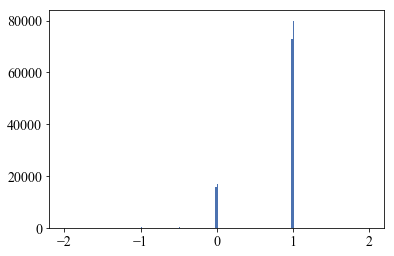

In [1309]:
fltr = (var_dataset['var_class']=='RRcd')&(var_dataset['amp_0']/var_dataset['amp_1']1)
plt.hist((var_dataset['cat_period']/(
    1./(1+1.*np.float64(var_dataset['significant_second_minimum']))*var_dataset['lsq_period'])-1),
        range=[-2,2],bins=200);

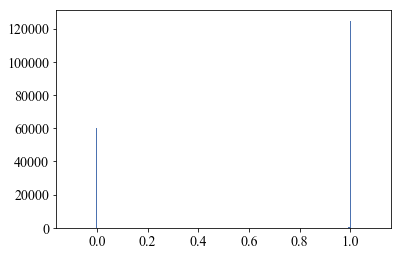

In [1358]:
fltr = (var_dataset['var_class']=='RRcd')
plt.hist((var_dataset['cat_period']/(var_dataset['lsq_period'])-1),
        range=[-0.1,1.1],bins=200);

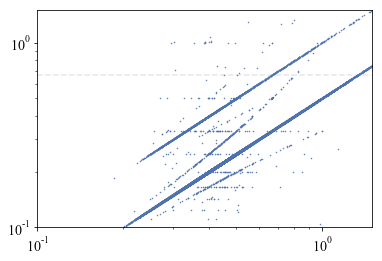

In [1628]:
plt.plot(var_dataset['cat_period'][var_dataset['var_class']=='EW'],
         var_dataset['lsq_period'][var_dataset['var_class']=='EW'],'.',
        ms=1)
plt.semilogy()
plt.semilogx()
plt.xlim(0.1,1.5)
plt.ylim(0.1,1.5)
plt.axhline(0.666,ls='dashed',color='gray',alpha=0.2)

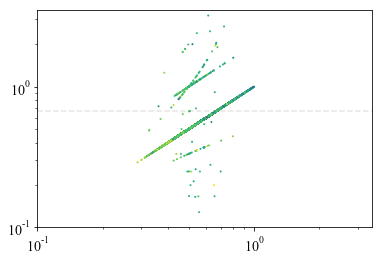

In [1654]:
plt.scatter(var_dataset['cat_period'][var_dataset['var_class']=='RRab'],
         period_fix(var_dataset,1.)[var_dataset['var_class']=='RRab'],
            c=var_dataset['ks_b_ivw_mean_mag'][var_dataset['var_class']=='RRab'],
        s=1,vmax=16)
plt.semilogy()
plt.semilogx()
plt.xlim(0.1,3.5)
plt.ylim(0.1,3.5)
plt.axhline(0.666,ls='dashed',color='gray',alpha=0.2)

In [1991]:
ff=(combo_dset['class']=='EA/EB')&(combo_dset['prob']>0.9)\
&(combo_dset['ks_b_ivw_mean_mag']<14.)
ii=np.argwhere(np.abs(var_dataset['cat_period']/period_fix(var_dataset,1.)-1).values[
    ff]>0.05)[50][0]
print(np.count_nonzero(np.abs(var_dataset['cat_period']/period_fix(var_dataset,1.)-1).values[
    ff]>0.05))

/data/jls/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


161


/data/jls/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [1992]:
print(((combo_dset['cat_period']).values[ff])[ii],
((period_fix(combo_dset,1.)).values[ff])[ii],
((combo_dset['lsq_period']).values[ff])[ii],
((combo_dset['significant_second_minimum']).values[ff])[ii],
((combo_dset['peak_ratio_model']).values[ff])[ii],
((combo_dset['peak_ratio_data']).values[ff])[ii],
((combo_dset['amp_0']/combo_dset['amp_1']).values[ff])[ii],
((combo_dset['class']).values[ff])[ii])

0.6449886 1.289978168078959 0.6449890840394795 False 1.0 0.986058235168457 0.07399702675102664 EA/EB


EA/EB
0.011011011011011011
False


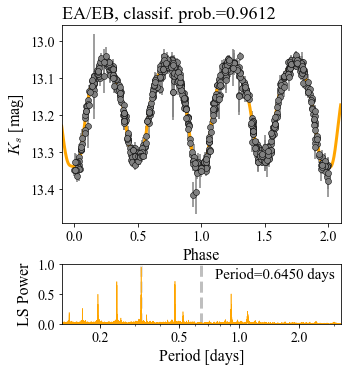

In [1993]:
rslt=plot_lightcurve('EA/EB',ii)

[[0.00253496]
 [0.00283918]]
False


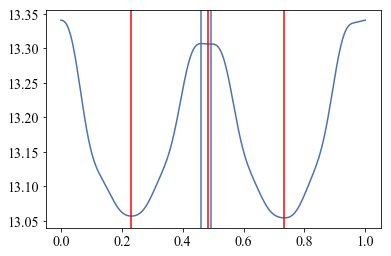

In [1986]:
from fine_classif.feat_extract.compute_feats import \
retrieve_fourier_poly_secondderiv, integer_periods
phase_range=[0.35,0.65]
phases = np.linspace(0.,1.,500)
min_phase = find_phase_of_minimum(rslt)
zero_deriv = retrieve_fourier_poly(rslt['lsq_period'] 
                            * (phases + min_phase), rslt)

first_deriv = retrieve_fourier_poly_firstderiv(rslt['lsq_period'] * (phases + min_phase), 
                                               rslt)
turning_points = (first_deriv[1:]*first_deriv[:-1]<0)
mid_phases = .5 * (phases[1:]+phases[:-1])
sign_at_tp = np.sign(retrieve_fourier_poly_secondderiv(rslt['lsq_period'] * (mid_phases + min_phase), rslt))
minima = np.argwhere((sign_at_tp<0)&turning_points&(mid_phases>phase_range[0])&(mid_phases<phase_range[1]))
maxima = np.argwhere((sign_at_tp>0)&turning_points)


n = len(first_deriv) - 1
distance = ((minima[:,np.newaxis] - maxima[np.newaxis,:]) + n//2)%(n) - n//2
distance_positive, distance_negative = distance.copy(), distance.copy()
distance_positive[distance_positive<0]=n+1
distance_negative[distance_negative>0]=-(n+1)

fpoly, fpoly_var = retrieve_fourier_poly(rslt['lsq_period'] * (mid_phases + min_phase)
                                         + integer_periods(rslt['lsq_time_zeropoint_poly'], rslt), 
                                                   rslt, with_var=True)
noise_thresh_factor=7.
min_distance = np.hstack([np.argsort(distance_positive, axis=1)[:,:1,0],
                              np.argsort(-distance_negative, axis=1)[:,:1,0]])

# Check if minima depth > noise_thresh * noise
noise = np.sqrt(fpoly_var[minima])
print(noise)
is_there_second_minimum = np.any((fpoly[minima] - np.nanmax(fpoly[maxima[min_distance]],axis=1)).flatten()>noise_thresh_factor*noise.flatten())
print(is_there_second_minimum)
plt.plot(phases,zero_deriv)
[plt.axvline(mid_phases[m]) for m in minima]
[plt.axvline(mid_phases[m],color='r') for m in maxima]

In [1858]:
rslt

{'amplitudes': array([0.0345351 , 0.08168262, 0.01547106, 0.03726202, 0.00842069,
        0.02092958, 0.01337286, 0.00561989, 0.00632017]),
 'amplitudes_cov': array([[ 1.47654002e-05, -1.14209073e-05,  6.91562098e-06,
         -5.77985844e-06, -1.85599407e-08, -4.86780880e-06,
          3.39323537e-06, -8.18732655e-07,  2.58663513e-06],
        [-1.14209073e-05,  1.50668480e-05, -8.63550342e-06,
          6.57946672e-06,  8.67255087e-07,  3.88261863e-06,
         -4.77430651e-06,  1.50699390e-06, -3.63628099e-06],
        [ 6.91562098e-06, -8.63550342e-06,  1.01531239e-05,
         -6.32573021e-06,  9.96388869e-07, -4.66816255e-06,
          4.50057932e-06, -1.90857661e-06,  2.86517640e-06],
        [-5.77985844e-06,  6.57946672e-06, -6.32573021e-06,
          9.63527137e-06, -3.57257520e-06,  6.45291775e-06,
         -4.21600125e-06,  8.87479224e-07, -2.66355341e-06],
        [-1.85599407e-08,  8.67255087e-07,  9.96388869e-07,
         -3.57257520e-06,  7.18321069e-06, -4.78619350e-06

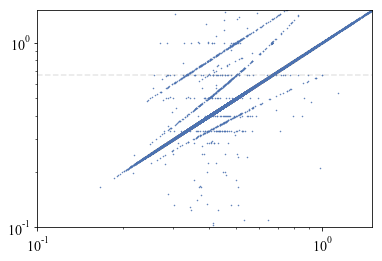

In [1635]:
plt.plot(var_dataset['cat_period'][var_dataset['var_class']=='EW'],
         period_fix(var_dataset,1.)[var_dataset['var_class']=='EW'],'.',
        ms=1)
plt.semilogy()
plt.semilogx()
plt.xlim(0.1,1.5)
plt.ylim(0.1,1.5)
plt.axhline(0.666,ls='dashed',color='gray',alpha=0.2)

In [2525]:
for ii in ['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']:
    fltr = (np.abs(var_dataset_full['cat_period']/(
        (1+np.float64(np.logical_xor((var_dataset_full['significant_second_minimum'].values==True),
                                     ((var_dataset_full['var_class']=='EA/EB')|
                                      (var_dataset_full['var_class']=='Ell')).values==True))
        -1.5*((var_dataset_full['amp_0']<var_dataset_full['amp_1'])
              &(~((var_dataset_full['var_class']=='EA/EB')|(var_dataset_full['var_class']=='Ell')))
             &(var_dataset_full['significant_second_minimum'])))*
        var_dataset_full['lsq_period']*(1*(var_dataset_full['var_class']=='EW')+1))-1)>0.01)\
    &(var_dataset_full['var_class']==ii)
    print(ii,'%0.2f'%(100*np.count_nonzero(fltr)/np.count_nonzero(var_dataset_full['var_class']==ii)))



EW 25.54
EA/EB 44.98
RRab 6.69
RRcd 26.75
Ell 28.88
CEP 8.13
T2CEP 4.92
LPV 52.88


In [2734]:
for ii in ['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']:
    fltr = (np.abs(var_dataset_full['cat_period'].values/period_fix(var_dataset_full)-1)>0.2)\
    &(var_dataset_full['var_class']==ii)
    print(ii,'%0.2f'%(100*np.count_nonzero(fltr)/np.count_nonzero(var_dataset_full['var_class']==ii)))

EW 22.22
EA/EB 42.06
RRab 6.45
RRcd 25.21
Ell 27.08
CEP 6.93
T2CEP 4.62
LPV 51.03


In [2733]:
for ii in ['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']:
    fltr = (np.abs(combo_dset['cat_period'].values/period_fix(combo_dset)-1)>0.2)\
    &(combo_dset['var_class']==ii)
    print(ii,'%0.2f'%(100*np.count_nonzero(fltr)/np.count_nonzero(combo_dset['var_class']==ii)))

EW 2.03
EA/EB 5.03
RRab 1.09
RRcd 4.86
Ell 3.69
CEP 2.33
T2CEP 2.39
LPV 48.91


In [2699]:
np.count_nonzero(combo_dset['var_class']=='LPV')

368

In [2698]:
np.count_nonzero(var_dataset['var_class']=='LPV')

368

In [2707]:
for ii in ['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']:
    fltr = (np.abs(var_dataset['cat_period'].values/period_fix(var_dataset)-1)>0.01)\
    &(var_dataset['var_class']==ii)
    print(ii,'%0.2f'%(100*np.count_nonzero(fltr)/np.count_nonzero(var_dataset['var_class']==ii)))

EW 2.45
EA/EB 5.41
RRab 1.10
RRcd 5.10
Ell 3.87
CEP 2.67
T2CEP 2.57
LPV 21.74


In [2526]:
for ii in ['EW','EA/EB','RRab','RRcd','Ell','CEP','T2CEP','LPV']:
    fltr = (np.abs(var_dataset['cat_period']/(
        (1+np.float64(np.logical_xor((var_dataset['significant_second_minimum'].values==True),
                                     ((var_dataset['var_class']=='EA/EB')|
                                      (var_dataset['var_class']=='Ell')).values==True))
        -1.5*((var_dataset['amp_0']<var_dataset['amp_1'])
              &(~((var_dataset['var_class']=='EA/EB')|(var_dataset['var_class']=='Ell')))
             &(var_dataset['significant_second_minimum'])))*
        var_dataset['lsq_period']*(1*(var_dataset['var_class']=='EW')+1))-1)>0.01)\
    &(var_dataset['var_class']==ii)
    print(ii,'%0.2f'%(100*np.count_nonzero(fltr)/np.count_nonzero(var_dataset['var_class']==ii)))


fltr2 = (np.abs(var_dataset['cat_period']/var_dataset['lsq_period']
               -1)>0.03)\
&(var_dataset['class']=='EA/EB')
# fltr = (np.abs(var_dataset['cat_period']/(
#     (1+np.float64((var_dataset['significant_second_minimum'].values==True))
#     -1.5*((var_dataset['amp_0']<var_dataset['amp_1'])
#          &(var_dataset['significant_second_minimum'])))*
#     var_dataset['lsq_period'])-1)>0.03)&(var_dataset['var_class']=='EA/EB')

# fltr = (np.abs(var_dataset['cat_period']/(
#     (1+np.float64(~(var_dataset['amp_0']<var_dataset['amp_1'])))
#     *var_dataset['lsq_period'])-1)>0.01)&(var_dataset['var_class']=='RRab')

fltr2 = ((var_dataset['cat_period']/(
    (1+np.float64(~var_dataset['significant_second_minimum']))
    *var_dataset['lsq_period'])-1)>-0.3)&(var_dataset['class']=='EA/EB')

EW 2.45
EA/EB 5.41
RRab 1.10
RRcd 5.10
Ell 3.87
CEP 2.67
T2CEP 2.57
LPV 22.01


In [1578]:
np.count_nonzero(fltr), np.count_nonzero(fltr2), np.count_nonzero(var_dataset['var_class']=='EA/EB')

(9693, 73038, 109127)

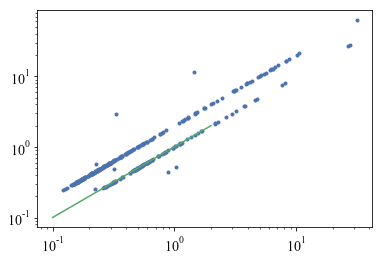

In [1614]:
plt.plot(var_dataset['lsq_period'][fltr],
        var_dataset['cat_period'][fltr],'.')
plt.semilogy()
plt.semilogx()
xx = np.linspace(0.1,2.)
plt.plot(xx,xx)
# plt.plot(xx,xx*.5)

(0.0, 0.2)

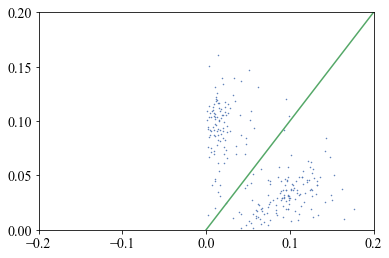

In [1474]:
# plt.plot(var_dataset['amp_1'][fltr2],
#         var_dataset['amp_0'][fltr2],'.',ms=1)

plt.plot(var_dataset['amp_0'][fltr],
        var_dataset['amp_1'][fltr],'.',ms=1)
xx = np.linspace(0.,0.2)
plt.plot(xx,xx)
plt.xlim(-0.2,0.2)
plt.ylim(0.,0.2)

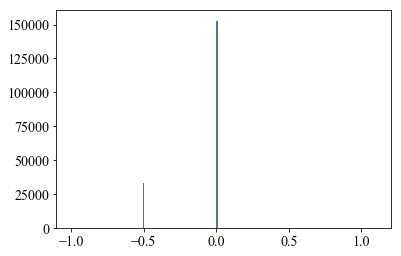

In [1360]:
fltr = (var_dataset['var_class']=='RRcd')
plt.hist((var_dataset['cat_period']/(
    (1+np.float64(~var_dataset['significant_second_minimum']))
    *var_dataset['lsq_period'])-1),
        range=[-1.,1.1],bins=200);

(-1.5, 1.5)

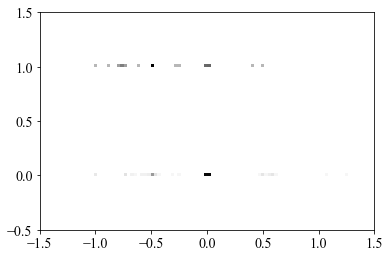

In [1283]:

row_norm((var_dataset['cat_period']/var_dataset['lsq_period']-1)[fltr],
        var_dataset['significant_second_minimum'][fltr]*1.,
        range=[[-1.5,1.5],[-0.5,1.5]],bins=100,
        norm=LogNorm())
plt.xlim(-1.5,1.5)

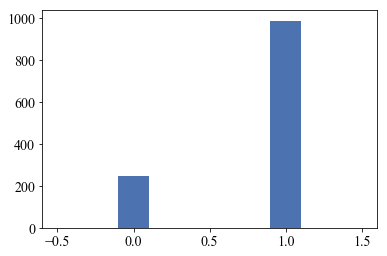

In [1269]:
ell = var_dataset[var_dataset['var_class']=='Ell'].reset_index(drop=True)
good = (np.abs(ell['cat_period']/ell['lsq_period']-1)<0.03)
plt.hist(np.float64(ell['significant_second_minimum'][good].values),
        range=[-0.5,1.5]);

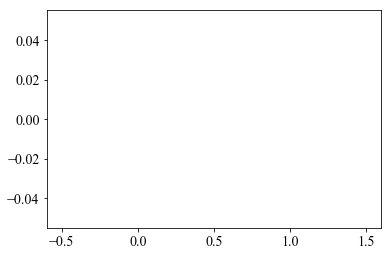

In [1267]:
rrcd = var_dataset[var_dataset['var_class']=='RRcd'].reset_index(drop=True)
good = (np.abs(rrcd['cat_period']/rrab['lsq_period']*.5-1)<0.03)
plt.hist(np.float64(rrcd['significant_second_minimum'][good].values),
        range=[-0.5,1.5]);

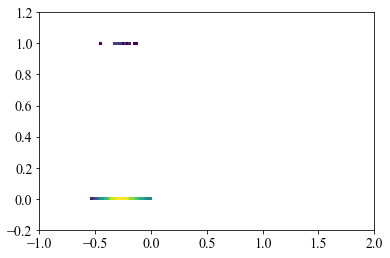

In [1257]:
rrab = var_dataset[var_dataset['var_class']=='RRab'].reset_index(drop=True)
good = (np.abs(rrab['cat_period']/rrab['lsq_period']-1)<0.03)
plt.hist2d(np.log10(rrab['lsq_period'])[good],
           rrab['significant_second_minimum'][good],bins=150,
           norm=LogNorm(),
          range=[[-1,2],[-0.2,1.2]]);

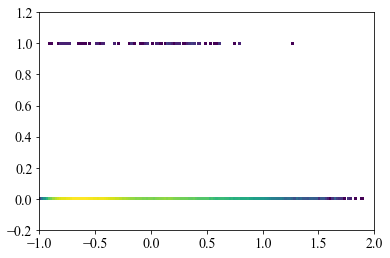

In [1254]:
good = (np.abs(eaeb['cat_period']/eaeb['lsq_period']*.5-1)<0.03)
plt.hist2d(np.log10(eaeb['lsq_period'])[good],
          eaeb['significant_second_minimum'][good],bins=150,
           norm=LogNorm(),
          range=[[-1,2],[-0.2,1.2]]);

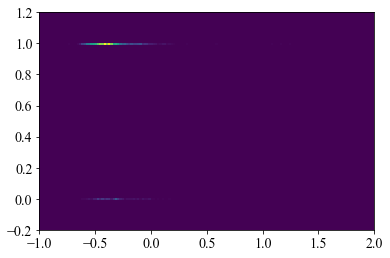

In [1251]:
good = (np.abs(ew['cat_period']/ew['lsq_period']-1)<0.03)
plt.hist2d(np.log10(ew['lsq_period'])[good],
          ew['significant_second_minimum'][good],bins=150,
          range=[[-1,2],[-0.2,1.2]]);